# Data Preperation

In [34]:
import pandas as pd

# Load the data from the CSV files
cities = pd.read_csv('dim_cities.csv')
respondents = pd.read_csv('dim_repondents.csv')
survey_responses = pd.read_csv('fact_survey_responses.csv')

# Display the first few rows of each dataframe
(cities.head(), respondents.head(), survey_responses.head())


(  City_ID       City    Tier
 0   CT111      Delhi  Tier 1
 1   CT112     Mumbai  Tier 1
 2   CT113  Bangalore  Tier 1
 3   CT114    Chennai  Tier 1
 4   CT115    Kolkata  Tier 2,
    Respondent_ID            Name    Age  Gender City_ID
 0         120031  Aniruddh Issac  15-18  Female   CT117
 1         120032     Trisha Rout  19-30    Male   CT118
 2         120033    Yuvraj  Virk  15-18    Male   CT116
 3         120034    Pranay Chand  31-45  Female   CT113
 4         120035  Mohanlal Joshi  19-30  Female   CT120,
    Response_ID  Respondent_ID  Consume_frequency  \
 0       103001         120031   2-3 times a week   
 1       103002         120032  2-3 times a month   
 2       103003         120033             Rarely   
 3       103004         120034   2-3 times a week   
 4       103005         120035              Daily   
 
                       Consume_time              Consume_reason Heard_before  \
 0  To stay awake during work/study  Increased energy and focus          Yes

In [35]:
# Join the tables on their respective keys
data = (
    survey_responses.merge(respondents, how="left", on="Respondent_ID")
    .merge(cities, how="left", on="City_ID")
)

# Display the first few rows of the merged DataFrame
pd.set_option('display.max_columns', None)
data.head()


,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2


In [36]:
data['Improvements_desired'].value_counts()

Improvements_desired
Reduced sugar content       2995
More natural ingredients    2498
Wider range of flavors      2037
Healthier alternatives      1472
Other                        998
Name: count, dtype: int64

## Sense Check

In [37]:
# Check for inconsistent responses
inconsistent_responses = data[(data['Heard_before'] == 'No') & (data['Taste_experience'] != 0)]
inconsistent_responses.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,Not interested in energy drinks,Bepsi,Availability,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise,Trisha Rout,19-30,Male,CT118,Pune,Tier 2
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,Not available locally,Bepsi,Availability,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late,Yuvraj Virk,15-18,Male,CT116,Hyderabad,Tier 1
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
6,103007,120037,2-3 times a month,To stay awake during work/study,Increased energy and focus,No,Positive,Not sure,No,4,Health concerns,Cola-Coka,Brand reputation,Other,Guarana,Yes,No,Online ads,Innovative bottle design,Yes,100-150,Other,Sports/exercise,Oorja Anne,19-30,Male,CT112,Mumbai,Tier 1
7,103008,120038,Rarely,Before exercise,To combat fatigue,No,Neutral,Healthy,Yes,4,Unfamiliar with the brand,Gangster,Brand reputation,Reduced sugar content,Sugar,Yes,Not Sure,Online ads,Compact and portable cans,Yes,50-99,Gyms and fitness centers,Social outings/parties,Rhea Khanna,19-30,Male,CT116,Hyderabad,Tier 1


The initial sense-check reveals some inconsistencies in the responses. There are respondents who reported that they hadn't heard about the drink but still provided a taste experience rating. This could indicate insincere or mistaken responses.

A potential approach to handle this could be to treat these inconsistent records as missing data or outliers, and exclude them from the analysis.

In [38]:
# Count the number of inconsistent responses
num_inconsistent_responses = inconsistent_responses.shape[0]

# Calculate the percentage of inconsistent responses
percentage_inconsistent = (num_inconsistent_responses / data.shape[0]) * 100

num_inconsistent_responses, percentage_inconsistent


(5553, 55.53)

# Primary Insights

## Demographic Insights

### Who are the Respondents?

In [39]:
# Count the number of responses by gender
gender_preference = data['Gender'].value_counts()

# Display the result
gender_preference


Gender
Male          6038
Female        3455
Non-binary     507
Name: count, dtype: int64

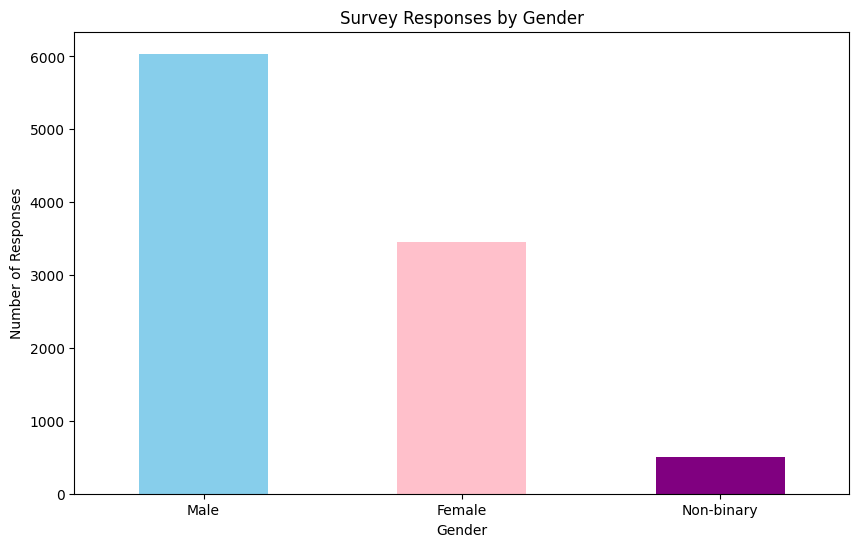

In [40]:
import matplotlib.pyplot as plt

# Create a bar plot for gender preference
plt.figure(figsize=(10, 6))
gender_preference.plot(kind='bar', color=['skyblue', 'pink', 'purple'])
plt.title('Survey Responses by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.show()


In [41]:
# Count the number of responses by age
age_preference = data['Age'].value_counts()

# Display the result
age_preference


Age
19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: count, dtype: int64

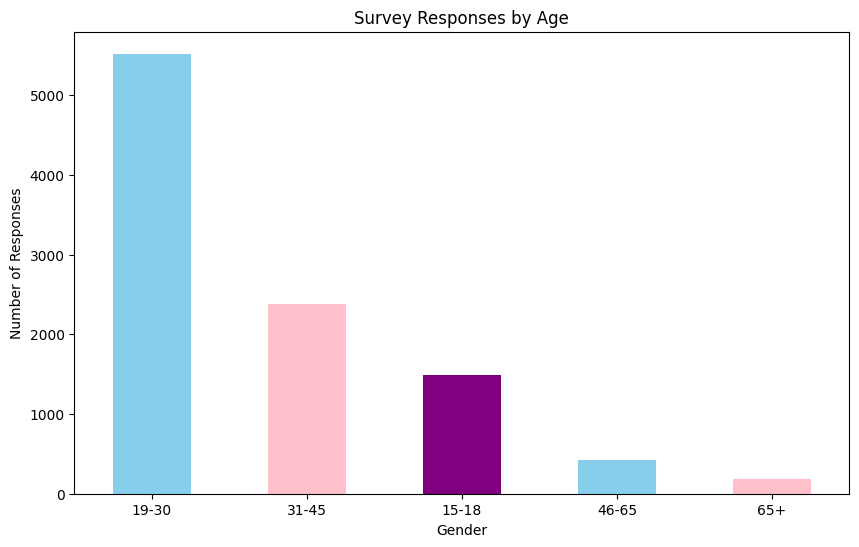

In [42]:
# Create a bar plot for gender preference
plt.figure(figsize=(10, 6))
age_preference.plot(kind='bar', color=['skyblue', 'pink', 'purple'])
plt.title('Survey Responses by Age')
plt.xlabel('Gender')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.show()

In [43]:
# Grouping the data by 'Gender' and 'Age' and calculating the count
gender_age = data.groupby(['Gender', 'Age'])['Response_ID'].count().unstack()

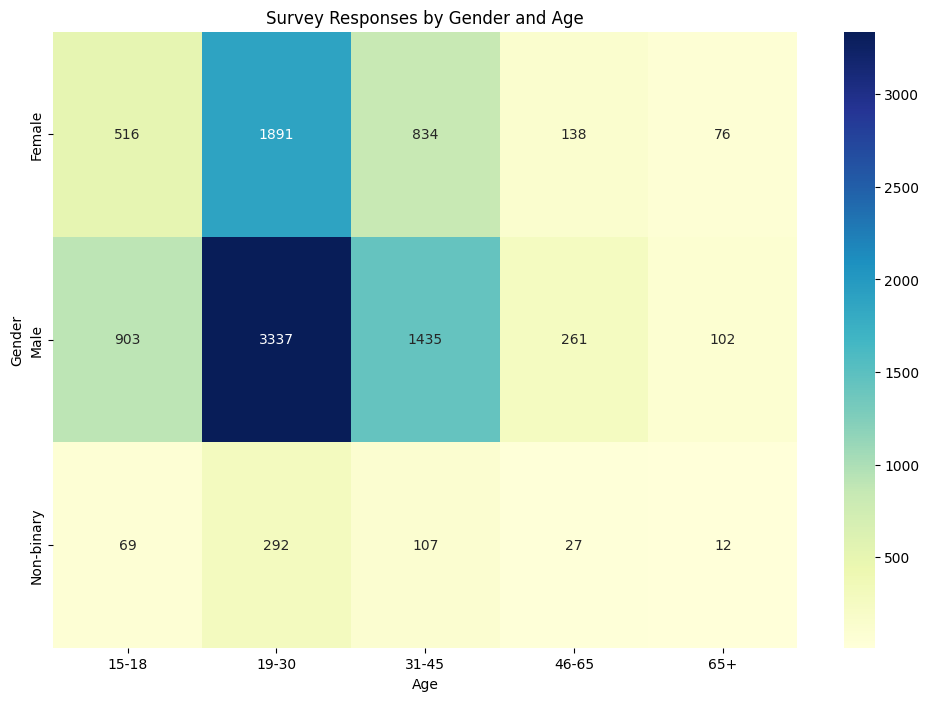

In [44]:
# Plotting the consumption frequency heatmap
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Survey Responses by Gender and Age')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

### Who drinks energy most frequently?

In [45]:
# Calculate the percentage of each gender group that prefers energy drinks
consume_frequency = ['Daily', '2-3 times a week']

gender_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby('Gender').size()
gender_total = data['Gender'].value_counts()
gender_preference_percentage = (gender_preference / gender_total) * 100

gender_preference_percentage


Gender
Female        48.712012
Male          48.211328
Non-binary    47.928994
dtype: float64

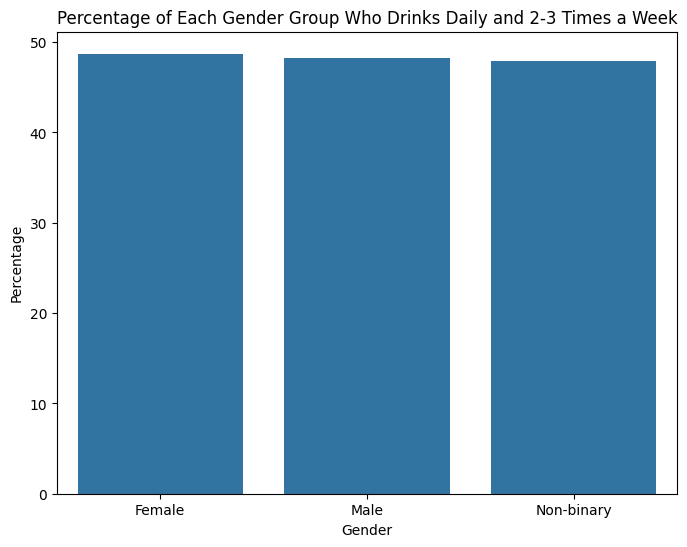

In [46]:
# Plotting the percentage of each gender group

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_preference_percentage.index, y=gender_preference_percentage.values)
plt.title('Percentage of Each Gender Group Who Drinks Daily and 2-3 Times a Week')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


In [47]:
# Calculate the percentage of each gender group that prefers energy drinks
consume_frequency = ['Daily', '2-3 times a week']

age_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby('Age').size()
age_total = data['Age'].value_counts()
Age_drinking_frequency = (age_preference / age_total) * 100

Age_drinking_frequency

Age
15-18    49.395161
19-30    48.061594
31-45    48.695286
46-65    46.244131
65+      50.000000
dtype: float64

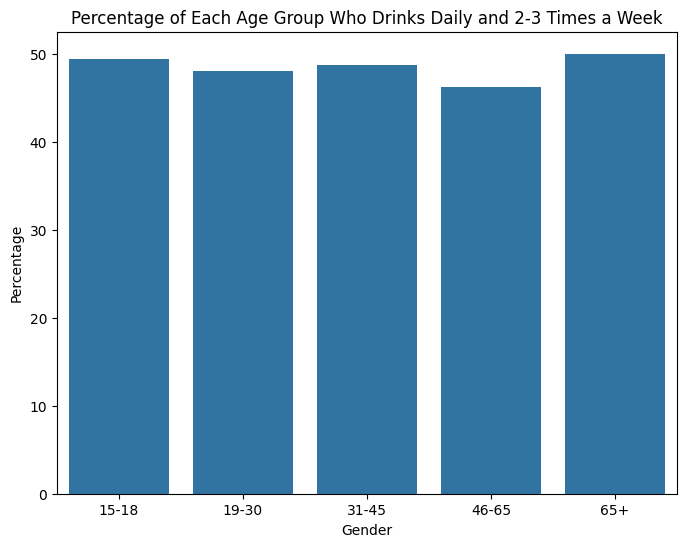

In [48]:
# Plotting the percentage of each gender group

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.barplot(x=Age_drinking_frequency.index, y=Age_drinking_frequency.values)
plt.title('Percentage of Each Age Group Who Drinks Daily and 2-3 Times a Week')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [49]:
age_preference = data[data['Consume_frequency'].isin(consume_frequency)].groupby(['Gender','Age']).size()

age_preference

Gender      Age  
Female      15-18     255
            19-30     924
            31-45     404
            46-65      64
            65+        36
Male        15-18     443
            19-30    1590
            31-45     705
            46-65     120
            65+        53
Non-binary  15-18      37
            19-30     139
            31-45      48
            46-65      13
            65+         6
dtype: int64

In [50]:
# Calculate the count of respondents for each combination of gender and age group
gender_age_counts = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Find the combination with the highest count
most_preferred_combination = gender_age_counts[gender_age_counts['Count'] == gender_age_counts['Count']]

most_preferred_combination


,Gender,Age,Count
0,Female,15-18,516
1,Female,19-30,1891
2,Female,31-45,834
3,Female,46-65,138
4,Female,65+,76
5,Male,15-18,903
6,Male,19-30,3337
7,Male,31-45,1435
8,Male,46-65,261
9,Male,65+,102


In [51]:
data["Gender"].value_counts()

Gender
Male          6038
Female        3455
Non-binary     507
Name: count, dtype: int64

In [52]:
# Calculate the count of respondents for each combination of gender and age group
gender_age_counts = data.groupby(['Gender', 'Age']).size().reset_index(name='Count')

# Find the combination with the highest count
most_preferred_combination = gender_age_counts[gender_age_counts['Count'] == gender_age_counts['Count']]

# Divide the count column by the total number per gender
gender_counts = data['Gender'].value_counts()
most_preferred_combination['Percentage'] = most_preferred_combination.apply(lambda row: row['Count'] / gender_counts[row['Gender']], axis=1)

most_preferred_combination


,Gender,Age,Count,Percentage
0,Female,15-18,516,0.149349
1,Female,19-30,1891,0.547323
2,Female,31-45,834,0.241389
3,Female,46-65,138,0.039942
4,Female,65+,76,0.021997
5,Male,15-18,903,0.149553
6,Male,19-30,3337,0.552666
7,Male,31-45,1435,0.237661
8,Male,46-65,261,0.043226
9,Male,65+,102,0.016893


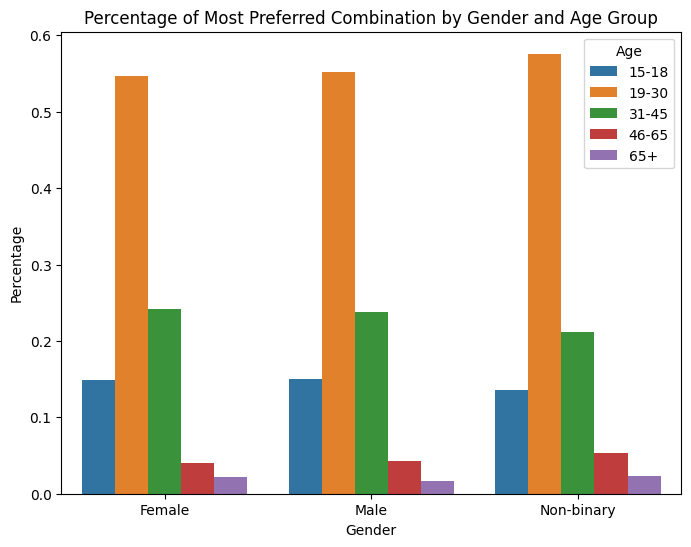

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the percentage count as a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Percentage', hue='Age', data=most_preferred_combination)
plt.title('Percentage of Most Preferred Combination by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


In [54]:
# Grouping the data by 'Gender' and 'Age' and calculating the consume frequency count
gender_age_consume = data.groupby(['Gender', 'Age'])['Consume_frequency'].value_counts().unstack().fillna(0)

gender_age_consume


Consume_frequency  2-3 times a month  2-3 times a week  Daily  Once a week  \
Gender     Age                                                               
Female     15-18                  74               198     57           78   
           19-30                 301               652    272          311   
           31-45                 144               292    112          125   
           46-65                  19                48     16           33   
           65+                    11                27      9           14   
Male       15-18                 147               312    131          156   
           19-30                 531              1159    431          533   
           31-45                 236               488    217          221   
           46-65                  41                95     25           48   
           65+                    13                40     13           15   
Non-binary 15-18                  11                29      8           10   
           19-30                  59               106     33           44   
           31-45                  18                29     19           15   
           46-65                   6                12      1            5   
           65+                     2                 4      2            1   

Consume_frequency  Rarely  
Gender     Age             
Female     15-18      109  
           19-30      355  
           31-45      161  
           46-65       22  
           65+         15  
Male       15-18      157  
           19-30      683  
           31-45      273  
           46-65       52  
           65+         21  
Non-binary 15-18       11  
           19-30       50  
           31-45       26  
           46-65        3  
           65+          3

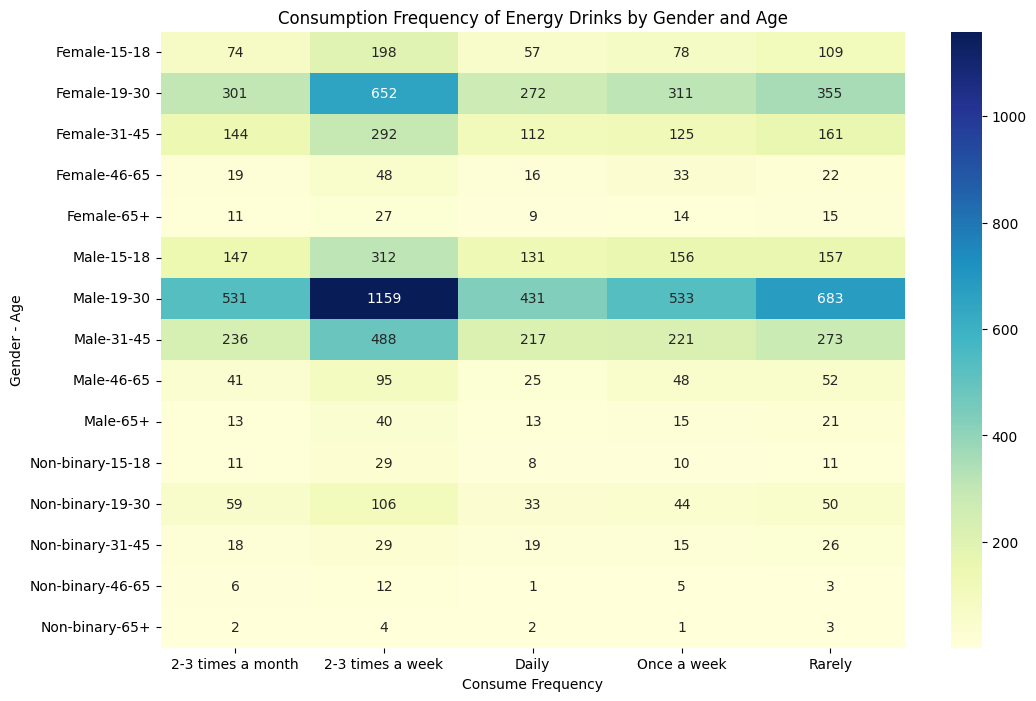

In [55]:
# Plotting the consumption frequency heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age_consume, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Consumption Frequency of Energy Drinks by Gender and Age')
plt.xlabel('Consume Frequency')
plt.ylabel('Gender - Age')
plt.show()


In [56]:
# Calculate the percentage of each consumption frequency category within each gender and age group combination
gender_age_consume_percentage = gender_age_consume.div(gender_age_consume.sum(axis=1), axis=0) * 100

gender_age_consume_percentage


Consume_frequency  2-3 times a month  2-3 times a week      Daily  \
Gender     Age                                                      
Female     15-18           14.341085         38.372093  11.046512   
           19-30           15.917504         34.479112  14.383924   
           31-45           17.266187         35.011990  13.429257   
           46-65           13.768116         34.782609  11.594203   
           65+             14.473684         35.526316  11.842105   
Male       15-18           16.279070         34.551495  14.507198   
           19-30           15.912496         34.731795  12.915793   
           31-45           16.445993         34.006969  15.121951   
           46-65           15.708812         36.398467   9.578544   
           65+             12.745098         39.215686  12.745098   
Non-binary 15-18           15.942029         42.028986  11.594203   
           19-30           20.205479         36.301370  11.301370   
           31-45           16.822430         27.102804  17.757009   
           46-65           22.222222         44.444444   3.703704   
           65+             16.666667         33.333333  16.666667   

Consume_frequency  Once a week     Rarely  
Gender     Age                             
Female     15-18     15.116279  21.124031  
           19-30     16.446325  18.773136  
           31-45     14.988010  19.304556  
           46-65     23.913043  15.942029  
           65+       18.421053  19.736842  
Male       15-18     17.275748  17.386489  
           19-30     15.972430  20.467486  
           31-45     15.400697  19.024390  
           46-65     18.390805  19.923372  
           65+       14.705882  20.588235  
Non-binary 15-18     14.492754  15.942029  
           19-30     15.068493  17.123288  
           31-45     14.018692  24.299065  
           46-65     18.518519  11.111111  
           65+        8.333333  25.000000

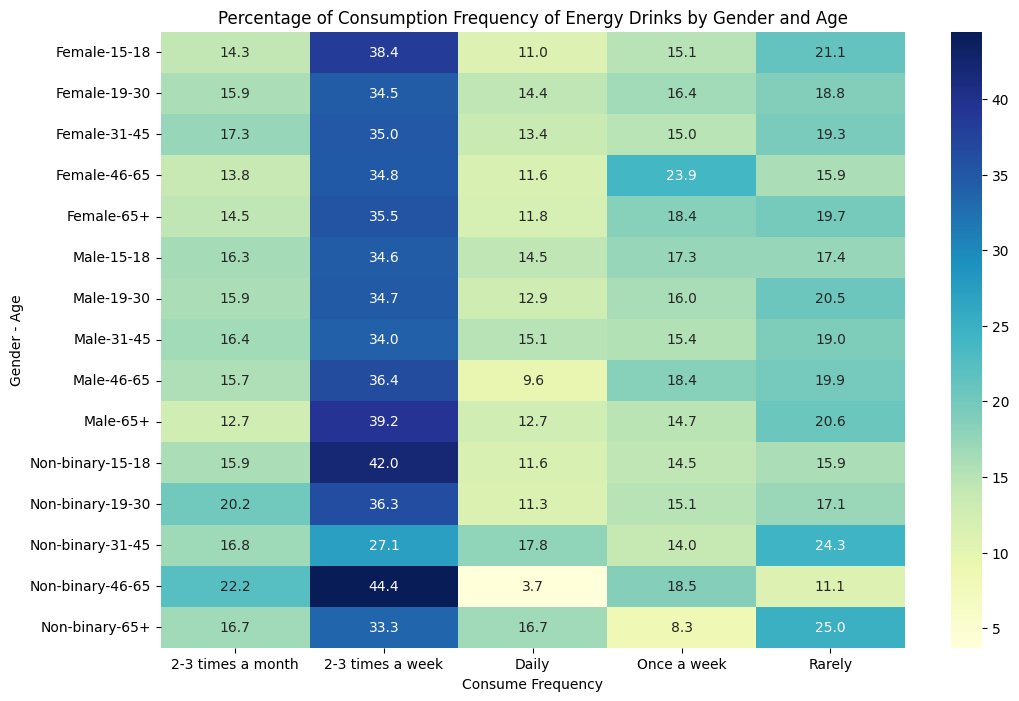

In [57]:
# Plotting the consumption frequency heatmap as a percentage
plt.figure(figsize=(12, 8))
sns.heatmap(gender_age_consume_percentage, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Percentage of Consumption Frequency of Energy Drinks by Gender and Age')
plt.xlabel('Consume Frequency')
plt.ylabel('Gender - Age')
plt.show()


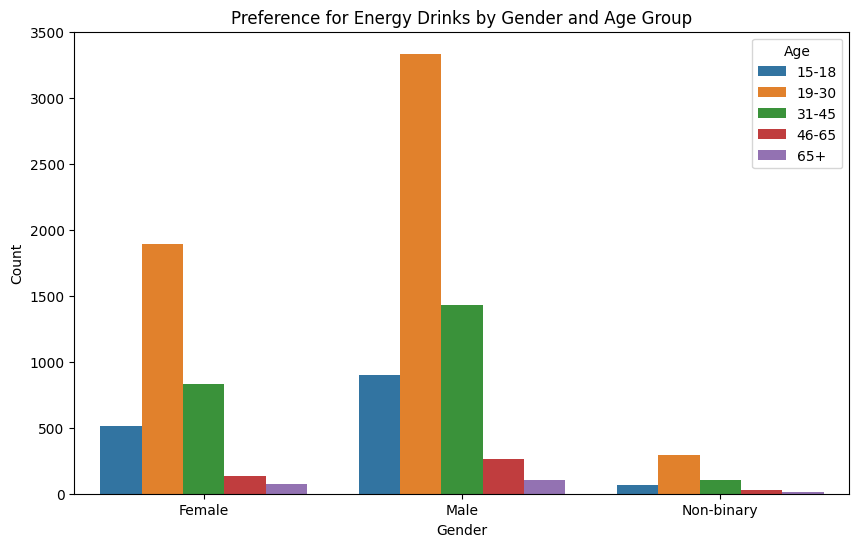

In [58]:
# Plotting the combination of gender and age group
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Count', hue='Age', data=most_preferred_combination)
plt.title('Preference for Energy Drinks by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


### Who has a negative perception towards energy drinks yet still drinks on a regular basis?

In [59]:
data['General_perception'].value_counts()

General_perception
Effective    2909
Not sure     2610
Healthy      2243
Dangerous    2238
Name: count, dtype: int64

In [60]:
# Filter the merged data to include only those where General_perception is either 'Healthy' or 'Effective'
filtered_responses = data[data['General_perception'].isin(['Not sure', 'Dangerous'])]

# Group by gender and count the responses
gender_perception = filtered_responses.groupby('Gender')['General_perception'].value_counts().unstack()

# Add a total column
gender_perception['Total'] = gender_perception.sum(axis=1)

# Display the updated dataframe
gender_perception


General_perception,Dangerous,Not sure,Total
Gender,,,
Female,1016,1025,2041
Male,1133,1433,2566
Non-binary,89,152,241


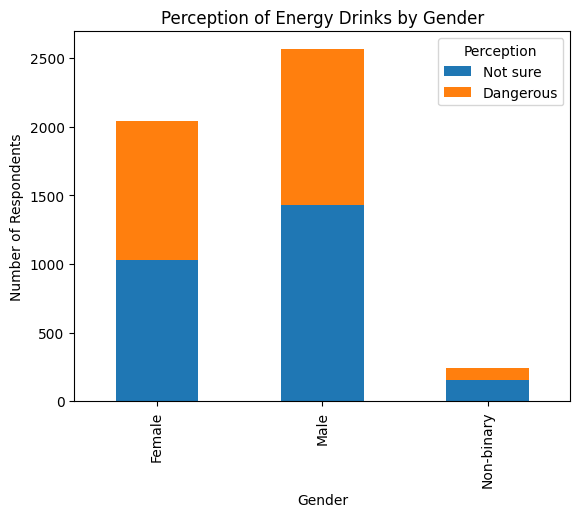

In [61]:
# Plot the perceptions
gender_perception[['Not sure', 'Dangerous']].plot(kind='bar', stacked=True)
plt.title('Perception of Energy Drinks by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Respondents')
plt.legend(title='Perception')
plt.show()


In [62]:
# Filter the data to include only those where General_perception is either 'Not sure' or 'Dangerous',
# or where Improvements_desired is 'Healthier alternatives' or 'More natural ingredients'
filtered_responses = data[(data['General_perception'].isin(['Not sure', 'Dangerous'])) |
                          (data['Improvements_desired'].isin(['Healthier alternatives', 'More natural ingredients']))]

# Define the consume frequency categories of interest
consume_frequency = ['2-3 times a week', 'Daily']

# Filter the responses to include only those with the desired consume frequency
filtered_responses = filtered_responses[filtered_responses['Consume_frequency'].isin(consume_frequency)]

# Group the filtered responses by gender and age, and count the size of each group
gender_age_drinking_frequency = filtered_responses.groupby(['Gender', 'Age']).size()

# Display the result
gender_age_drinking_frequency


Gender      Age  
Female      15-18    173
            19-30    717
            31-45    316
            46-65     46
            65+       20
Male        15-18    273
            19-30    984
            31-45    546
            46-65     92
            65+       35
Non-binary  15-18     25
            19-30     94
            31-45     41
            46-65      8
            65+        5
dtype: int64

In [63]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the series to a DataFrame and reset the index
Target_Market = gender_age_drinking_frequency.reset_index()

# Rename the 0 column to 'Count'
Target_Market = Target_Market.rename(columns={0: 'Count'})


# Create a pivot table for the heatmap
pivot_table = Target_Market.pivot('Gender', 'Age', 'Count')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Target Market: Attracting Energy Drink Lovers Seeking Better Options')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [64]:
# Filter the data to create the new DataFrame
tm_df = data[(data['Consume_frequency'].isin(['2-3 times a week', 'Daily'])) &
             ((data['General_perception'].isin(['Not sure', 'Dangerous'])) |
              (data['Improvements_desired'].isin(['Healthier alternatives', 'More natural ingredients'])))]

# Display the first few rows of the new DataFrame
tm_df.head()


,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,Reasons_preventing_trying,Current_brands,Reasons_for_choosing_brands,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations,Name,Age,Gender,City_ID,City,Tier
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,Unfamiliar with the brand,Blue Bull,Availability,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late,Aniruddh Issac,15-18,Female,CT117,Ahmedabad,Tier 2
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,Other,Bepsi,Other,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise,Pranay Chand,31-45,Female,CT113,Bangalore,Tier 1
4,103005,120035,Daily,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Effective,Yes,5,Other,Sky 9,Other,More natural ingredients,Caffeine,Yes,Yes,Online ads,Compact and portable cans,Yes,100-150,Online retailers,Studying/working late,Mohanlal Joshi,19-30,Female,CT120,Lucknow,Tier 2
12,103013,120043,2-3 times a week,Before exercise,To enhance sports performance,No,Neutral,Healthy,Yes,4,Not available locally,Gangster,Taste/flavor preference,More natural ingredients,Caffeine,Yes,No,Online ads,Innovative bottle design,No,50-99,Gyms and fitness centers,Studying/working late,Kimaya Borde,19-30,Male,CT113,Bangalore,Tier 1
14,103015,120045,2-3 times a week,To stay awake during work/study,Increased energy and focus,No,Positive,Healthy,Yes,5,Not interested in energy drinks,Bepsi,Availability,Healthier alternatives,Sugar,Yes,Yes,Outdoor billboards,Compact and portable cans,Yes,Above 150,Supermarkets,Social outings/parties,Azad Gera,65+,Male,CT113,Bangalore,Tier 1


In [65]:
# Filter the merged data to include only those where General_perception is either 'Healthy' or 'Effective'
filtered_responses = data[data['General_perception'].isin(['Healthy', 'Effective'])]

# Group by gender and count the responses
gender_and_age_perception = filtered_responses.groupby(['Gender','Age'])['General_perception'].value_counts().unstack()

# Add a total column
gender_and_age_perception['Total'] = gender_and_age_perception.sum(axis=1)

# Display the updated dataframe
gender_and_age_perception

General_perception  Effective  Healthy  Total
Gender     Age                               
Female     15-18          169      146    315
           19-30          320      380    700
           31-45          194       98    292
           46-65           46       12     58
           65+             27       22     49
Male       15-18          330      270    600
           19-30         1170     1016   2186
           31-45          392      128    520
           46-65           71       31    102
           65+             37       27     64
Non-binary 15-18           25       17     42
           19-30           89       80    169
           31-45           26        7     33
           46-65           10        4     14
           65+              3        5      8

In [66]:
# Filter the merged data to include only those where General_perception is either 'Healthy' or 'Effective'
filtered_responses = data[data['General_perception'].isin(['Healthy', 'Effective'])]

# Group by gender and count the responses
gender_and_age_perception = filtered_responses.groupby(['Gender','Age'])['General_perception'].value_counts().unstack()

# Add a total column
gender_and_age_perception['Total'] = gender_and_age_perception.sum(axis=1)

# Display the updated dataframe
gender_and_age_perception


General_perception  Effective  Healthy  Total
Gender     Age                               
Female     15-18          169      146    315
           19-30          320      380    700
           31-45          194       98    292
           46-65           46       12     58
           65+             27       22     49
Male       15-18          330      270    600
           19-30         1170     1016   2186
           31-45          392      128    520
           46-65           71       31    102
           65+             37       27     64
Non-binary 15-18           25       17     42
           19-30           89       80    169
           31-45           26        7     33
           46-65           10        4     14
           65+              3        5      8

In [67]:
# Calculate the count of responses per gender
gender_counts = filtered_responses['Gender'].value_counts()

def gender_totals(row):
    if row.name[0] == 'Male':
        return row['Total'] / gender_counts['Male']
    elif row.name[0] == 'Female':
        return row['Total'] / gender_counts['Female']
    else:
        return row['Total'] / gender_counts['Non-binary']

# Divide the 'Total' column by the total number per gender
gender_and_age_perception['Percentage'] = gender_and_age_perception.apply(gender_totals, axis=1)

gender_and_age_perception

General_perception  Effective  Healthy  Total  Percentage
Gender     Age                                           
Female     15-18          169      146    315    0.222772
           19-30          320      380    700    0.495050
           31-45          194       98    292    0.206506
           46-65           46       12     58    0.041018
           65+             27       22     49    0.034653
Male       15-18          330      270    600    0.172811
           19-30         1170     1016   2186    0.629608
           31-45          392      128    520    0.149770
           46-65           71       31    102    0.029378
           65+             37       27     64    0.018433
Non-binary 15-18           25       17     42    0.157895
           19-30           89       80    169    0.635338
           31-45           26        7     33    0.124060
           46-65           10        4     14    0.052632
           65+              3        5      8    0.030075

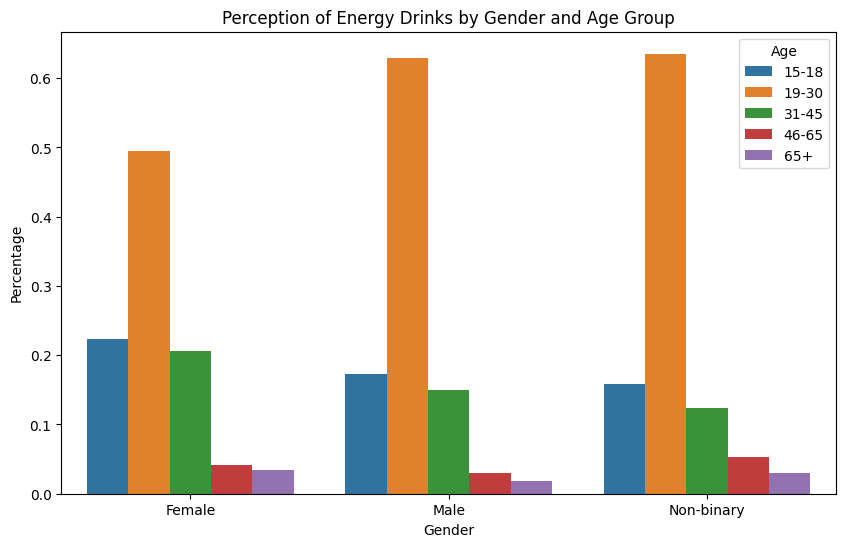

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of gender_perception
gender_and_age_perception = gender_and_age_perception.reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Percentage', hue='Age', data=gender_and_age_perception)
plt.title('Perception of Energy Drinks by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


### Which type of marketing reaches the most Youth (15-30)?

In [69]:
# Filter the dataframe for the 15-30 age group
youth_df = data[data['Age'].isin(['15-18', '19-30'])]

# Count the number of responses by marketing channel
marketing_channels = youth_df['Marketing_channels'].value_counts()

# Display the result
marketing_channels


Marketing_channels
Online ads            3373
TV commercials        1785
Other                  702
Outdoor billboards     702
Print media            446
Name: count, dtype: int64

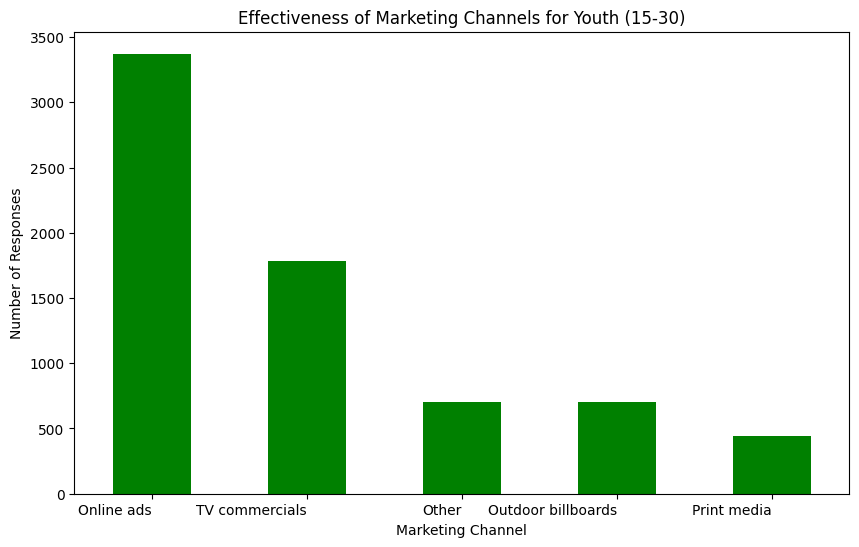

In [70]:
# Create a bar plot for marketing channel effectiveness
plt.figure(figsize=(10, 6))
marketing_channels.plot(kind='bar', color='green')
plt.title('Effectiveness of Marketing Channels for Youth (15-30)')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0, ha='right')
plt.show()


The effectiveness of different marketing channels in reaching the youth (15-30 years old), according to the survey responses, is as follows:

Online ads: 3373 responses
TV commercials: 1785 responses
Outdoor billboards: 702 responses
Other: 702 responses
Print media: 446 responses
This suggests that online ads are the most effective marketing channel for reaching youth (15-30 years old), according to the survey responses.


In [71]:
# Count the number of responses by marketing channel
tm_marketing_channels = tm_df['Marketing_channels'].value_counts()

# Display the result
tm_marketing_channels

Marketing_channels
Online ads            1322
TV commercials         927
Outdoor billboards     417
Other                  411
Print media            298
Name: count, dtype: int64

In [ ]:
# Create a bar plot for marketing channel effectiveness
plt.figure(figsize=(10, 6))
tm_marketing_channels.plot(kind='bar', color='green')
plt.title('Effectiveness of Marketing Channels for our Target Market')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Responses')
plt.xticks(rotation=30, ha='right')
plt.show()

### How does brand perception vary across different age groups and genders?

In [74]:
# Check how brand perception varies across different age groups
brand_perception_by_age = data.groupby('Age')['Brand_perception'].value_counts(normalize=True).unstack()

# Check how brand perception varies across different genders
brand_perception_by_gender = data.groupby('Gender')['Brand_perception'].value_counts(normalize=True).unstack()

brand_perception_by_age, brand_perception_by_gender


(Brand_perception  Negative   Neutral  Positive
 Age                                           
 15-18             0.174731  0.595430  0.229839
 19-30             0.176812  0.601993  0.221196
 31-45             0.176347  0.593434  0.230219
 46-65             0.180751  0.593897  0.225352
 65+               0.194737  0.536842  0.268421,
 Brand_perception  Negative   Neutral  Positive
 Gender                                        
 Female            0.189870  0.587554  0.222576
 Male              0.169924  0.601192  0.228884
 Non-binary        0.171598  0.619329  0.209073)

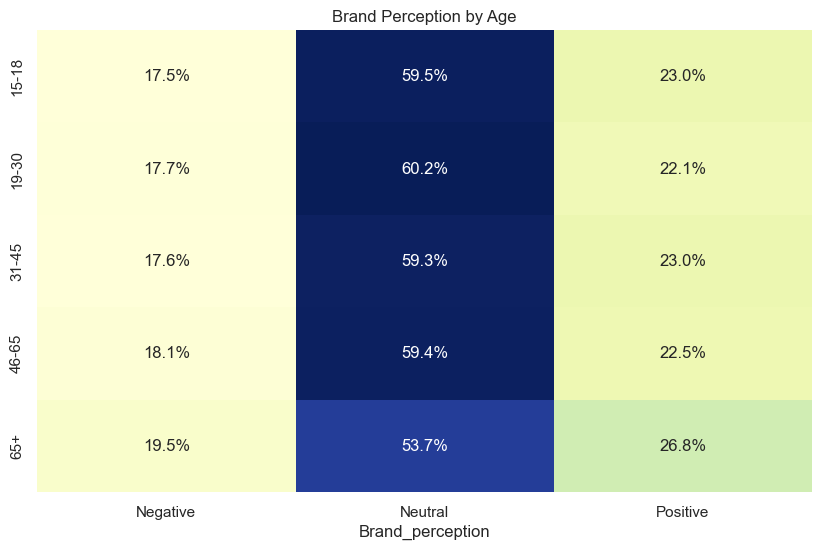

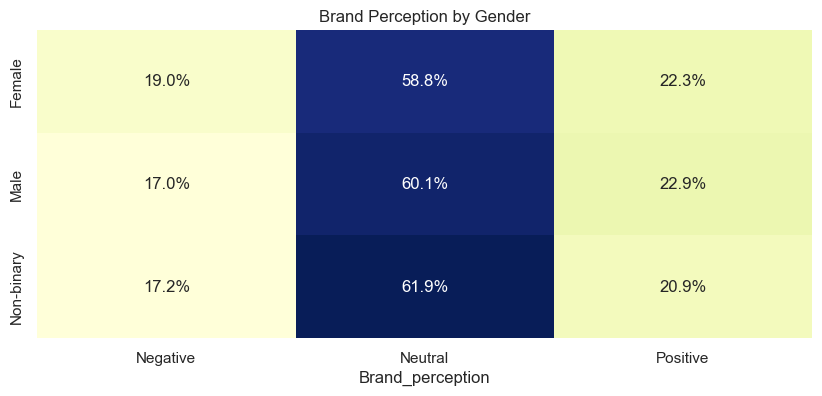

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plot
sns.set(style="whitegrid")

# Brand Perception by Age
plt.figure(figsize=(10, 6))
sns.heatmap(brand_perception_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Brand Perception by Age')
plt.ylabel('')
plt.show()

# Brand Perception by Gender
plt.figure(figsize=(10, 4))
sns.heatmap(brand_perception_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Brand Perception by Gender')
plt.ylabel('')
plt.show()


**Brand Perception by Age:**

This heatmap shows the proportion of each brand perception category ("Negative", "Neutral", "Positive") within each age group. The darker the color, the higher the proportion. From the heatmap, it is evident that the brand perception is mostly neutral across all age groups. However, the age group of 65+ years has a relatively higher percentage of positive brand perception compared to other age groups.

**Brand Perception by Gender:**

This heatmap shows the proportion of each brand perception category within each gender. Again, the brand perception is mostly neutral across all genders. But, the Non-binary group has a slightly higher percentage of neutral brand perception, and Females have a slightly higher percentage of negative brand perception.

These insights can be used to guide marketing strategies and efforts, such as crafting gender- and age-specific marketing messages.

### What type of packaging is preferred by different age groups and genders?

In [75]:
# Check packaging preference across different age groups
packaging_pref_by_age = data.groupby('Age')['Packaging_preference'].value_counts(normalize=True).unstack()

# Check packaging preference across different genders
packaging_pref_by_gender = data.groupby('Gender')['Packaging_preference'].value_counts(normalize=True).unstack()

packaging_pref_by_age, packaging_pref_by_gender


(Packaging_preference  Collectible packaging  Compact and portable cans  \
 Age                                                                      
 15-18                              0.145833                   0.405242   
 19-30                              0.153986                   0.399457   
 31-45                              0.140572                   0.394781   
 46-65                              0.161972                   0.370892   
 65+                                0.163158                   0.421053   
 
 Packaging_preference  Eco-friendly design  Innovative bottle design     Other  
 Age                                                                            
 15-18                            0.100134                  0.307796  0.040995  
 19-30                            0.096920                  0.300000  0.049638  
 31-45                            0.106481                  0.312710  0.045455  
 46-65                            0.063380                  0.330986

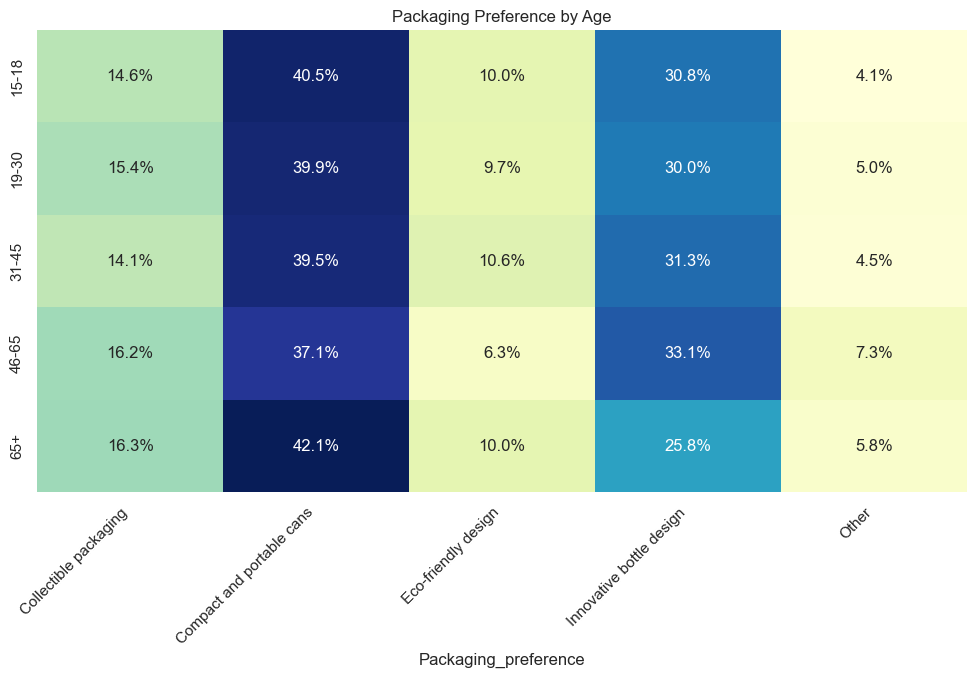

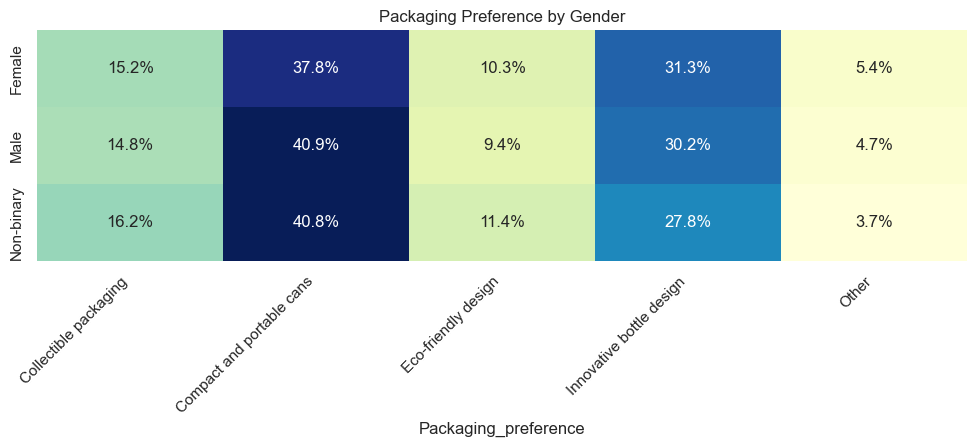

In [76]:
# Packaging Preference by Age
plt.figure(figsize=(12, 6))
sns.heatmap(packaging_pref_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Packaging Preference by Age')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# Packaging Preference by Gender
plt.figure(figsize=(12, 3))
sns.heatmap(packaging_pref_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Packaging Preference by Gender')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

**Packaging Preference by Age:**

This heatmap shows the proportion of each packaging preference category within each age group. The darker the color, the higher the proportion. The most preferred type of packaging across all age groups is "Compact and portable cans", followed by "Innovative bottle design".

**Packaging Preference by Gender:**

This heatmap shows the proportion of each packaging preference category within each gender. Again, "Compact and portable cans" is the most preferred type of packaging across all genders, followed by "Innovative bottle design".

These visualizations can help the marketing team understand the packaging preferences of different demographics and guide packaging design decisions. For instance, they could focus on making the cans more compact and portable, and incorporate innovative design elements that appeal to younger demographics.

### What are the main Reasons for per consumption per demographic group?


In [77]:
# Check the main reasons for consuming energy drinks across different age groups
reasons_by_age = data.groupby('Age')['Consume_reason'].value_counts(normalize=True).unstack()

# Check the main reasons for consuming energy drinks across different genders
reasons_by_gender = data.groupby('Gender')['Consume_reason'].value_counts(normalize=True).unstack()

reasons_by_age, reasons_by_gender


(Consume_reason  Increased energy and focus     Other  To boost performance  \
 Age                                                                          
 15-18                             0.360887  0.086694              0.153226   
 19-30                             0.355616  0.087862              0.151268   
 31-45                             0.359007  0.087963              0.145623   
 46-65                             0.361502  0.089202              0.176056   
 65+                               0.352632  0.100000              0.157895   
 
 Consume_reason  To combat fatigue  To enhance sports performance  
 Age                                                               
 15-18                    0.233871                       0.165323  
 19-30                    0.247826                       0.157428  
 31-45                    0.247896                       0.159512  
 46-65                    0.190141                       0.183099  
 65+                      0.221053   

From this analysis, we can observe:

Across all demographics, the most common reason for consuming energy drinks is "Increased energy and focus".
The second most common reason varies: for the age group it's "To combat fatigue", while for the gender group it's different for each gender.
Other observations include: "To enhance sports performance" is relatively more common among Males and the 46-65 age group; the "Other" reason is particularly high among Females.
These insights can help in crafting marketing messages that align with the main reasons why different demographic groups consume energy drinks.

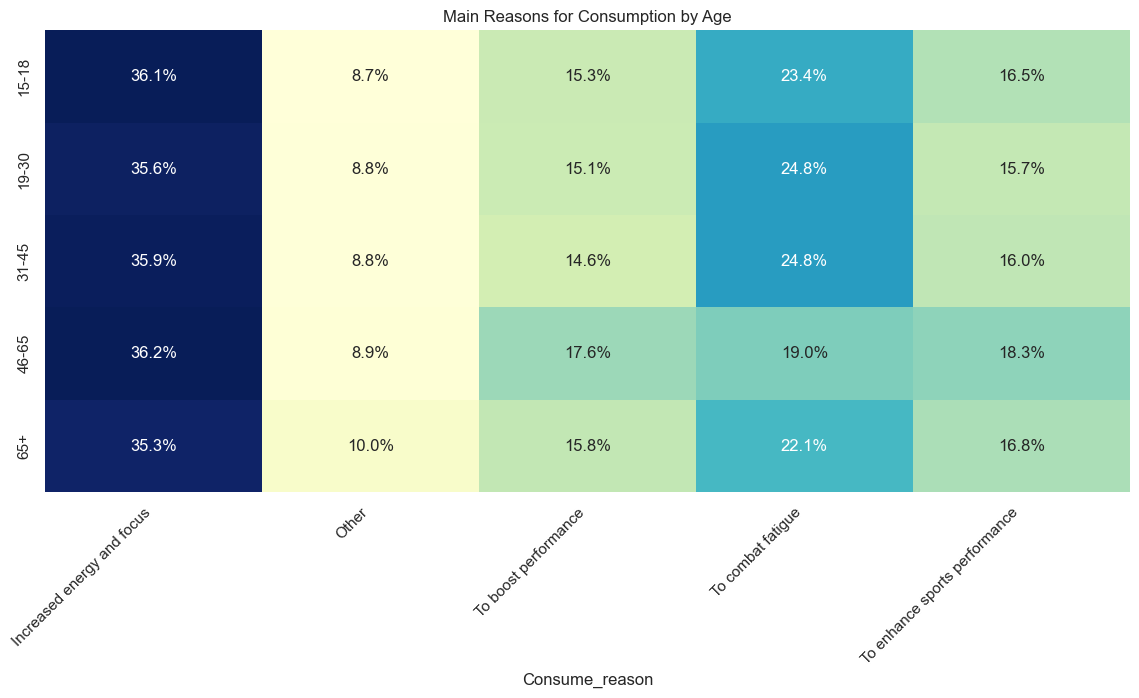

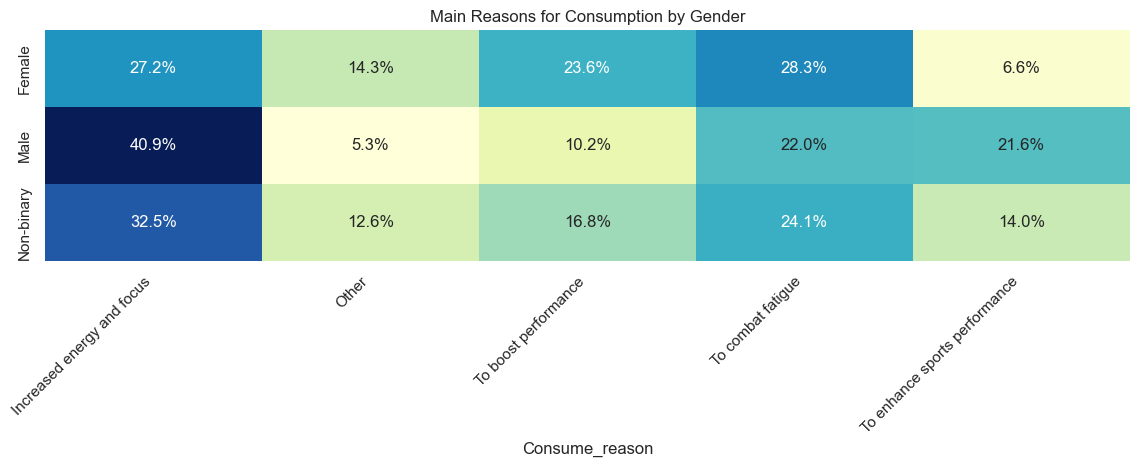

In [78]:
# Main Reasons for Consumption by Age
plt.figure(figsize=(14, 6))
sns.heatmap(reasons_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Main Reasons for Consumption by Age')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# Main Reasons for Consumption by Gender
plt.figure(figsize=(14, 3))
sns.heatmap(reasons_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('Main Reasons for Consumption by Gender')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()


**Main Reasons for Consumption by Age:**

This heatmap shows the proportion of each reason for consumption within each age group. The most common reason across all age groups is "Increased energy and focus", followed by "To combat fatigue".

**Main Reasons for Consumption by Gender:**

This heatmap shows the proportion of each reason for consumption within each gender. "Increased energy and focus" is the most common reason across all genders, with Males showing a notably higher proportion. Females show a relatively high proportion for "To combat fatigue".

### What is the perception of energy drinks in general per demographic

In [79]:
# Check the perception of energy drinks in general across different age groups
perception_by_age = data.groupby('Age')['General_perception'].value_counts(normalize=True).unstack()

# Check the perception of energy drinks in general across different genders
perception_by_gender = data.groupby('Gender')['General_perception'].value_counts(normalize=True).unstack()

perception_by_age, perception_by_gender


(General_perception  Dangerous  Effective   Healthy  Not sure
 Age                                                         
 15-18                0.054435   0.352151  0.290995  0.302419
 19-30                0.117391   0.286051  0.267391  0.329167
 31-45                0.541667   0.257576  0.098064  0.102694
 46-65                0.502347   0.298122  0.110329  0.089202
 65+                  0.042105   0.352632  0.284211  0.321053,
 General_perception  Dangerous  Effective   Healthy  Not sure
 Gender                                                      
 Female               0.294067   0.218813  0.190449  0.296671
 Male                 0.187645   0.331236  0.243789  0.237330
 Non-binary           0.175542   0.301775  0.222880  0.299803)

The age groups of 31-45 and 46-65 perceive energy drinks as more dangerous compared to other age groups.
The 15-18 and 65+ age groups, and all genders, are relatively unsure about their perception of energy drinks.
Males perceive energy drinks as more effective compared to Females and Non-binary groups.
These insights can help in crafting marketing messages that address these perceptions. For instance, messages for the 31-45 and 46-65 age groups could aim to address safety concerns, while messages for Males could leverage the perception of effectiveness.

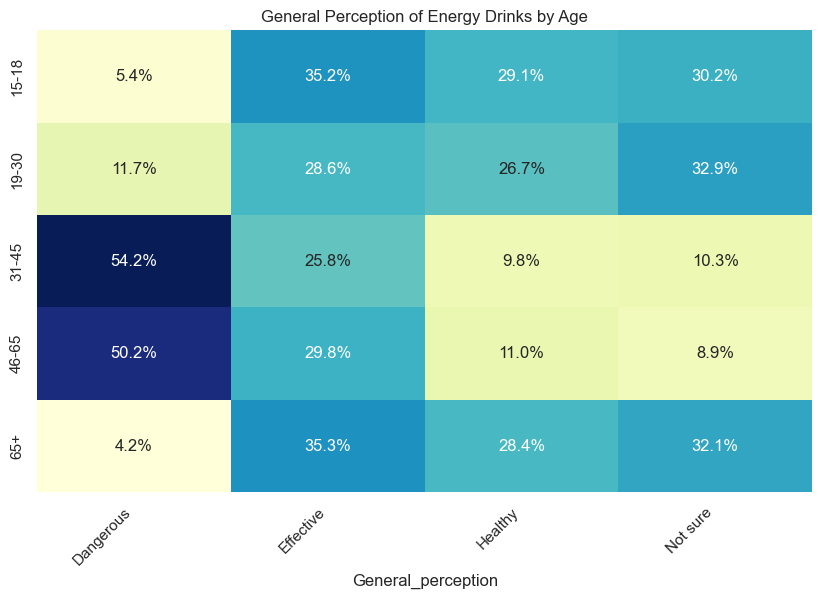

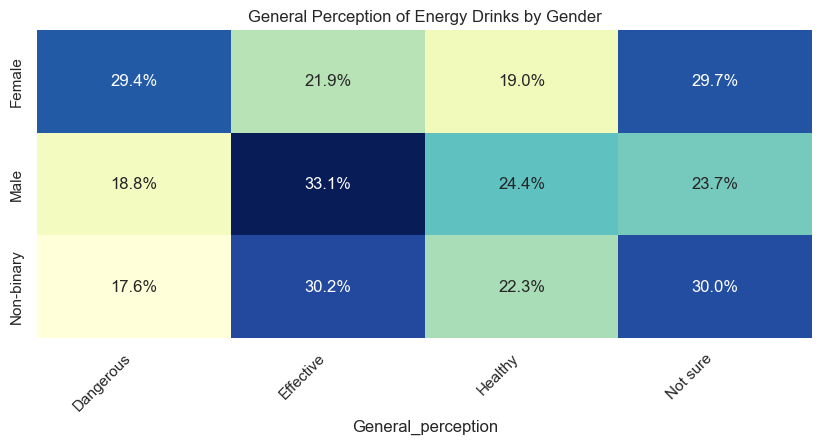

In [80]:
# General Perception by Age
plt.figure(figsize=(10, 6))
sns.heatmap(perception_by_age, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('General Perception of Energy Drinks by Age')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# General Perception by Gender
plt.figure(figsize=(10, 4))
sns.heatmap(perception_by_gender, cmap="YlGnBu", annot=True, fmt=".1%", cbar=False)
plt.title('General Perception of Energy Drinks by Gender')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.show()


## Consumer Preferences

### What are the preferred ingredients of energy drinks among respondents?

In [81]:
# Check the preferred ingredients among respondents
preferred_ingredients = data['Ingredients_expected'].value_counts(normalize=True)

preferred_ingredients


Ingredients_expected
Caffeine    0.3896
Vitamins    0.2534
Sugar       0.2017
Guarana     0.1553
Name: proportion, dtype: float64

The preferred ingredients of energy drinks among respondents are:

Caffeine: 38.96%
Vitamins: 25.34%
Sugar: 20.17%
Guarana: 15.53%
It appears that Caffeine is the most preferred ingredient among the respondents, followed by Vitamins. Guarana is the least preferred.

These insights can guide product development decisions, such as the formulation of the energy drink. For example, given the preference for Caffeine and Vitamins, the company could consider formulating a drink with these ingredients as the main components.

C:\Users\HP\AppData\Local\Temp\ipykernel_9172\1397800414.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=preferred_ingredients.index, y=preferred_ingredients.values, palette="Blues_d")


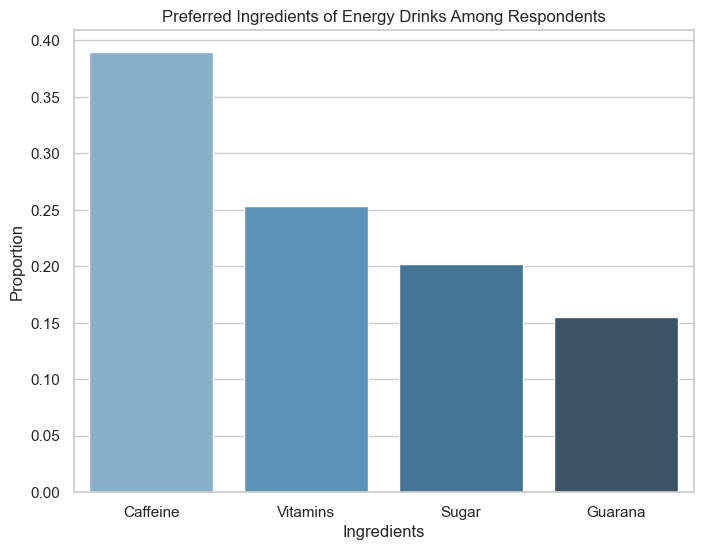

In [82]:
# Create a bar plot for preferred ingredients
plt.figure(figsize=(8, 6))
sns.barplot(x=preferred_ingredients.index, y=preferred_ingredients.values, palette="Blues_d")
plt.xlabel('Ingredients')
plt.ylabel('Proportion')
plt.title('Preferred Ingredients of Energy Drinks Among Respondents')
plt.show()

From the bar plot, it's clear that Caffeine is the most preferred ingredient among the respondents, followed by Vitamins, Sugar, and Guarana. This visualization can provide a quick and intuitive understanding of the respondents' ingredient preferences for energy drinks.

These insights can guide product development and marketing efforts. For example, the company could highlight the presence of preferred ingredients like Caffeine and Vitamins in their marketing messages to attract potential customers.

#### What are the preferred ingredients of energy drinks among our Target Market?

C:\Users\HP\AppData\Local\Temp\ipykernel_9172\4088620424.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tm_preferred_ingredients.index, y=tm_preferred_ingredients.values, palette="Blues_d")


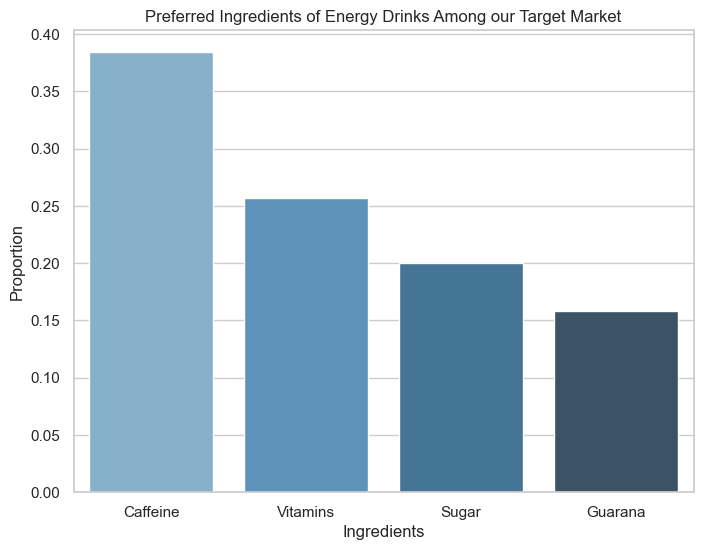

In [83]:
# Check the preferred ingredients among respondents
tm_preferred_ingredients = tm_df['Ingredients_expected'].value_counts(normalize=True)


# Create a bar plot for preferred ingredients
plt.figure(figsize=(8, 6))
sns.barplot(x=tm_preferred_ingredients.index, y=tm_preferred_ingredients.values, palette="Blues_d")
plt.xlabel('Ingredients')
plt.ylabel('Proportion')
plt.title('Preferred Ingredients of Energy Drinks Among our Target Market')
plt.show()

### What packaging preferences do respondents have for energy drinks?

In [84]:
# Check the packaging preference for the general population
packaging_pref_general = data['Packaging_preference'].value_counts(normalize=True)

packaging_pref_general

Packaging_preference
Compact and portable cans    0.3984
Innovative bottle design     0.3047
Collectible packaging        0.1501
Eco-friendly design          0.0983
Other                        0.0485
Name: proportion, dtype: float64

Compact and portable cans: 39.84%
Innovative bottle design: 30.47%
Collectible packaging: 15.01%
Eco-friendly design: 9.83%
Other: 4.85%
From this, we can observe that the most preferred type of packaging among the general population is "Compact and portable cans", followed by "Innovative bottle design". The least preferred is "Other".

These insights can guide packaging design decisions. For instance, the company could focus on making the cans more compact and portable, and incorporate innovative design elements in the bottles. They could also consider improving the eco-friendliness and collectibility of their packaging to cater to those preferences.


C:\Users\HP\AppData\Local\Temp\ipykernel_9172\2555809295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=packaging_pref_general.index, y=packaging_pref_general.values, palette="Blues_d")


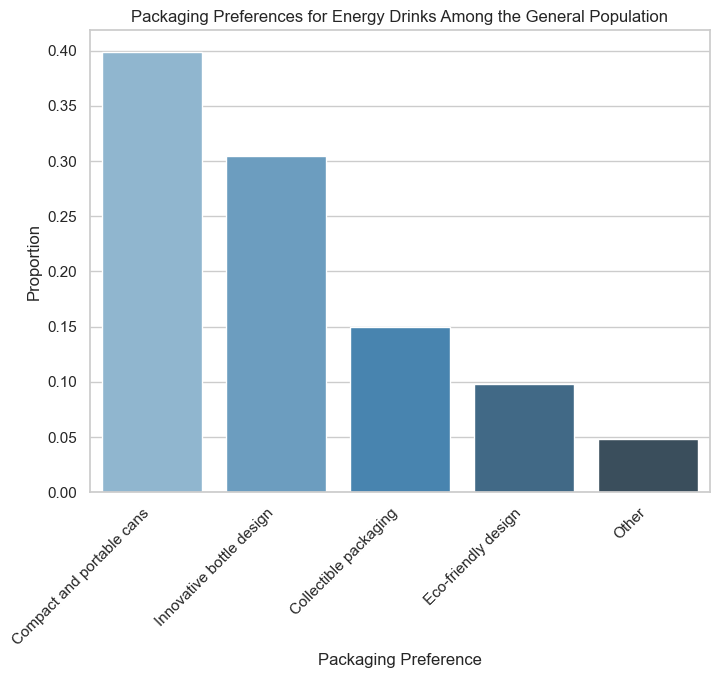

In [85]:
# Create a bar plot for packaging preferences for the general population
plt.figure(figsize=(8, 6))
sns.barplot(x=packaging_pref_general.index, y=packaging_pref_general.values, palette="Blues_d")
plt.xlabel('Packaging Preference')
plt.ylabel('Proportion')
plt.title('Packaging Preferences for Energy Drinks Among the General Population')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_9172\336175770.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=packaging_pref_tm.index, y=packaging_pref_tm.values, palette="Blues_d")


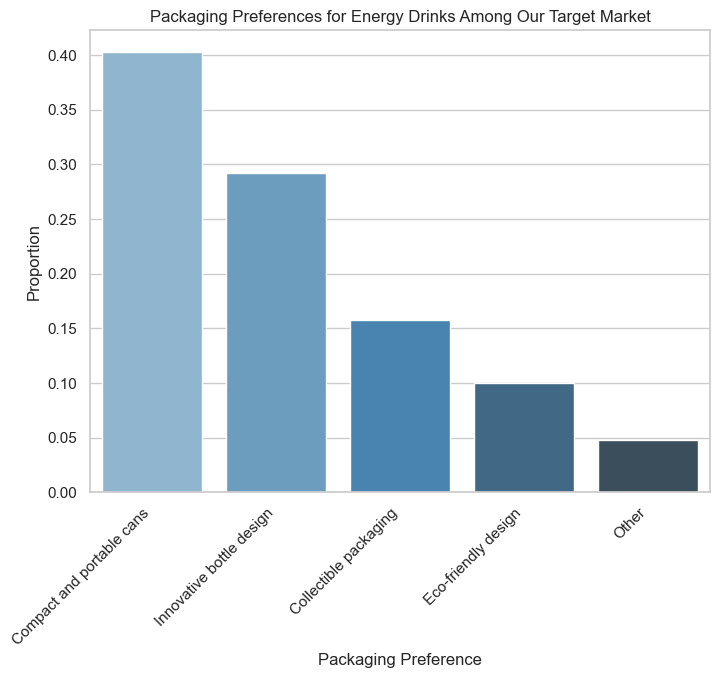

In [86]:
# Check the packaging preference for the general population
packaging_pref_tm = tm_df['Packaging_preference'].value_counts(normalize=True)

# Create a bar plot for packaging preferences for the general population
plt.figure(figsize=(8, 6))
sns.barplot(x=packaging_pref_tm.index, y=packaging_pref_tm.values, palette="Blues_d")
plt.xlabel('Packaging Preference')
plt.ylabel('Proportion')
plt.title('Packaging Preferences for Energy Drinks Among Our Target Market')
plt.xticks(rotation=45, ha='right')
plt.show()

## Competition Analysis:

### Who are the current market leaders?

In [87]:
# Check the current market leaders
market_leaders = data['Current_brands'].value_counts(normalize=True)

market_leaders


Current_brands
Cola-Coka    0.2538
Bepsi        0.2112
Gangster     0.1854
Blue Bull    0.1058
CodeX        0.0980
Sky 9        0.0979
Others       0.0479
Name: proportion, dtype: float64

Cola-Coka: 25.38%
Bepsi: 21.12%
Gangster: 18.54%
Blue Bull: 10.58%
CodeX: 9.80%
Sky 9: 9.79%
Others: 4.79%
From this, we can observe that Cola-Coka is the most consumed brand among the respondents, followed by Bepsi and Gangster. CodeX, the brand we are analyzing, is in the fifth position, consumed by approximately 9.8% of the respondents. This indicates that CodeX has room to grow its market share.

These insights can guide marketing strategies. For instance, the company could aim to understand what makes the leading brands popular and incorporate those learnings into their product development and marketing efforts. They could also focus on differentiating CodeX from these brands to carve out a unique position in the market.

C:\Users\HP\AppData\Local\Temp\ipykernel_9172\3051234487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_leaders.index, y=market_leaders.values, palette="Blues_d")


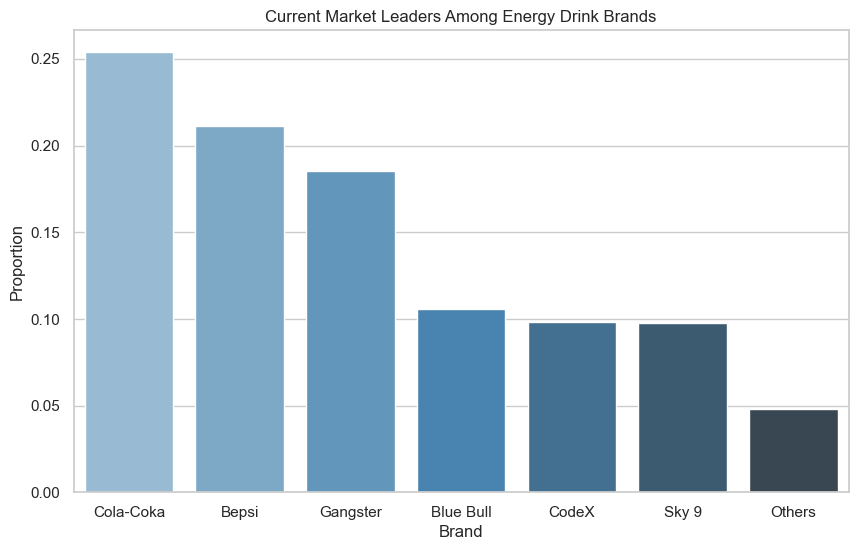

In [88]:
# Create a bar plot for market leaders
plt.figure(figsize=(10, 6))
sns.barplot(x=market_leaders.index, y=market_leaders.values, palette="Blues_d")
plt.xlabel('Brand')
plt.ylabel('Proportion')
plt.title('Current Market Leaders Among Energy Drink Brands')
plt.show()


In [89]:
# Check the current market leaders
market_leaders_tm = tm_df['Current_brands'].value_counts(normalize=True)

market_leaders_tm

Current_brands
Cola-Coka    0.243556
Bepsi        0.215111
Gangster     0.192593
Blue Bull    0.109926
CodeX        0.098074
Sky 9        0.094815
Others       0.045926
Name: proportion, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_9172\1811966545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_leaders_tm.index, y=market_leaders_tm.values, palette="Blues_d")


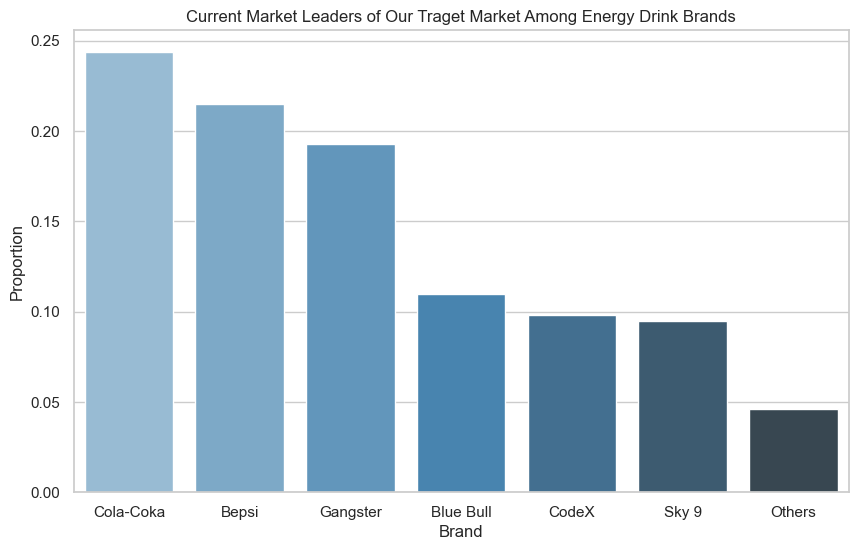

In [90]:
# Create a bar plot for market leaders
plt.figure(figsize=(10, 6))
sns.barplot(x=market_leaders_tm.index, y=market_leaders_tm.values, palette="Blues_d")
plt.xlabel('Brand')
plt.ylabel('Proportion')
plt.title('Current Market Leaders of Our Traget Market Among Energy Drink Brands')
plt.show()

### What are the primary reasons consumers prefer those brands over ours?

In [91]:
# Extracting the reasons for choosing other brands over ours
reasons_for_choosing_brands = data[data['Current_brands'] != 'CodeX'] ['Reasons_for_choosing_brands'].value_counts()

reasons_for_choosing_brands

Reasons_for_choosing_brands
Brand reputation           2393
Taste/flavor preference    1829
Availability               1715
Effectiveness              1572
Other                      1511
Name: count, dtype: int64

We analyzed the 'Reasons_for_choosing_brands' column from the survey data, which provides the reasons respondents gave for choosing other brands over ours. The reasons include 'Brand reputation', 'Taste/flavor preference', 'Availability', 'Effectiveness', and 'Other'.

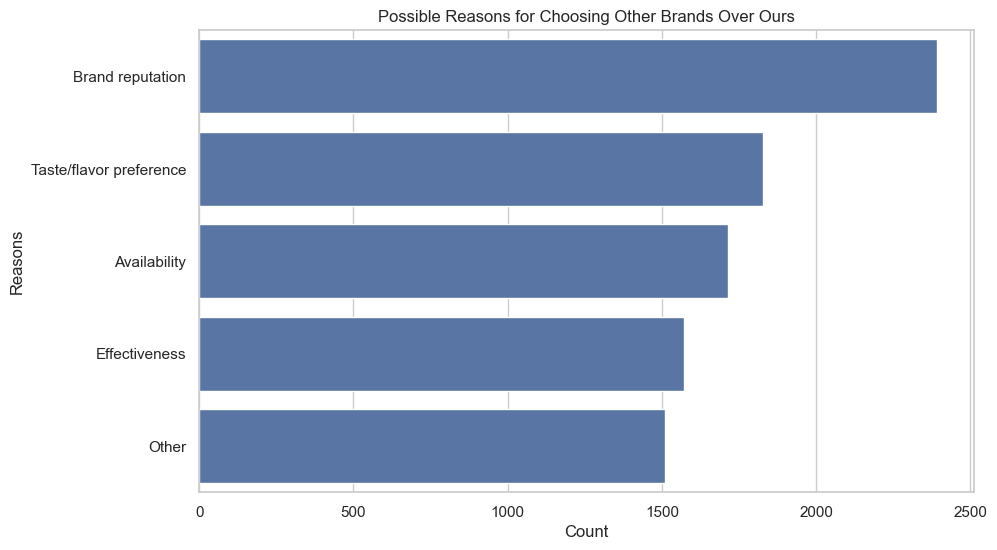

In [92]:
# Plotting the reasons for choosing other brands
plt.figure(figsize=(10, 6))
sns.barplot(y=reasons_for_choosing_brands.index, x=reasons_for_choosing_brands.values, orient='h')
plt.title('Possible Reasons for Choosing Other Brands Over Ours')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.show()


From the chart, it is clear that:

'Brand reputation' is the most cited reason for respondents choosing other brands over ours. This suggests that consumers place a high value on the reputation of the brand when choosing energy drinks.

'Taste/flavor preference' and 'Availability' are the next most common reasons. This indicates that the taste of the product and its availability in the market are also significant factors influencing the brand choice of consumers.

'Effectiveness' and 'Other' reasons were less frequently cited, but still represent a considerable portion of the responses.

To improve competitiveness, CodeX could consider strategies to enhance brand reputation, cater to consumer taste preferences, ensure widespread availability of the product, and communicate its effectiveness. Moreover, it might be beneficial to investigate the 'Other' reasons in more detail to understand any additional areas for improvement.

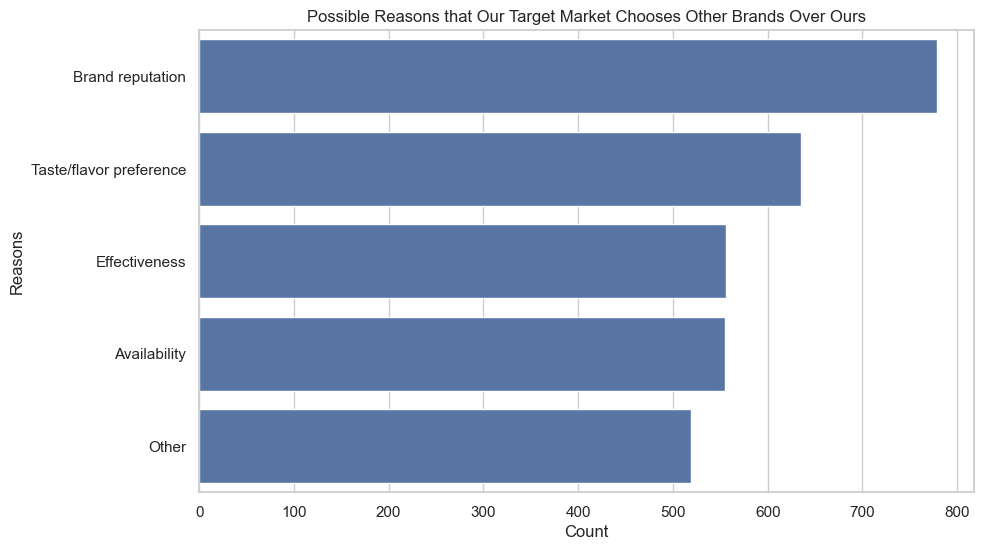

In [93]:
# Extracting the reasons for choosing other brands over ours
reasons_for_choosing_brands_tm = tm_df[tm_df['Current_brands'] != 'CodeX'] ['Reasons_for_choosing_brands'].value_counts()

reasons_for_choosing_brands_tm


# Plotting the reasons for choosing other brands
plt.figure(figsize=(10, 6))
sns.barplot(y=reasons_for_choosing_brands_tm.index, x=reasons_for_choosing_brands_tm.values, orient='h')
plt.title('Possible Reasons that Our Target Market Chooses Other Brands Over Ours')
plt.xlabel('Count')
plt.ylabel('Reasons')
plt.show()

## Marketing Channels and Brand Awareness

### Which marketing channel can be used to reach more customers?

In [94]:
# Extracting the marketing channels data
marketing_channels = data['Marketing_channels'].value_counts()

marketing_channels

Marketing_channels
Online ads            4020
TV commercials        2688
Outdoor billboards    1226
Other                 1225
Print media            841
Name: count, dtype: int64

We analyzed the 'Marketing_channels' column from the survey data, which indicates the marketing channels through which respondents heard about energy drinks.

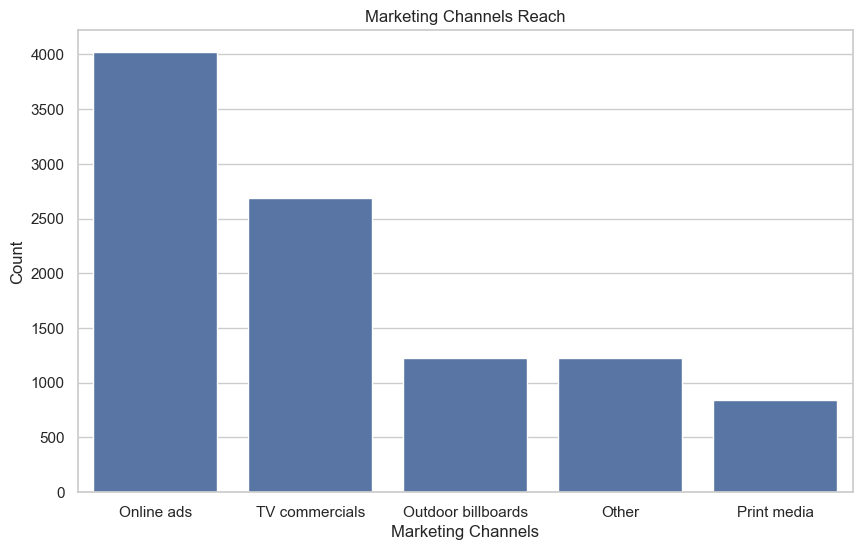

In [95]:
# Plotting the marketing channels
plt.figure(figsize=(10, 6))
sns.barplot(x=marketing_channels.index, y=marketing_channels.values)
plt.title('Marketing Channels Reach')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')
plt.show()


From the chart, we can see that:

'Online ads' is the marketing channel that reaches the most respondents. This suggests that digital marketing strategies, particularly online advertising, could be the most effective way to reach potential customers.

'TV commercials' is the next most effective marketing channel, reaching a substantial number of respondents. This indicates that traditional media still plays a significant role in marketing and should be considered in the marketing mix.

'Outdoor billboards', 'Other' methods, and 'Print media' reach fewer respondents, but these channels still represent a considerable portion of the market and should not be overlooked.

Overall, these insights suggest that a multi-channel marketing strategy, with a strong focus on online ads and TV commercials, could potentially reach the most customers. It could also be beneficial to investigate the 'Other' methods to understand any additional effective marketing channels.

### How effective are different marketing strategies and channels in reaching our customers?

In [96]:
# Grouping and filtering the data to count the number of respondents who have heard before
effectiveness_df = data[data['Heard_before'] == 'Yes'].groupby('Marketing_channels').size().reset_index(name='Count')

effectiveness_df.sort_values(by='Count', ascending=False)



,Marketing_channels,Count
0,Online ads,1805
4,TV commercials,1257
2,Outdoor billboards,524
1,Other,490
3,Print media,371


We analyzed the 'Marketing_channels' and 'Heard_before' columns from the survey data. The 'Marketing_channels' column represents the channels through which respondents heard about energy drinks, and the 'Heard_before' column represents whether respondents had heard about the product before. The count of 'Heard_before' gives us an indication of how effective each marketing channel is.

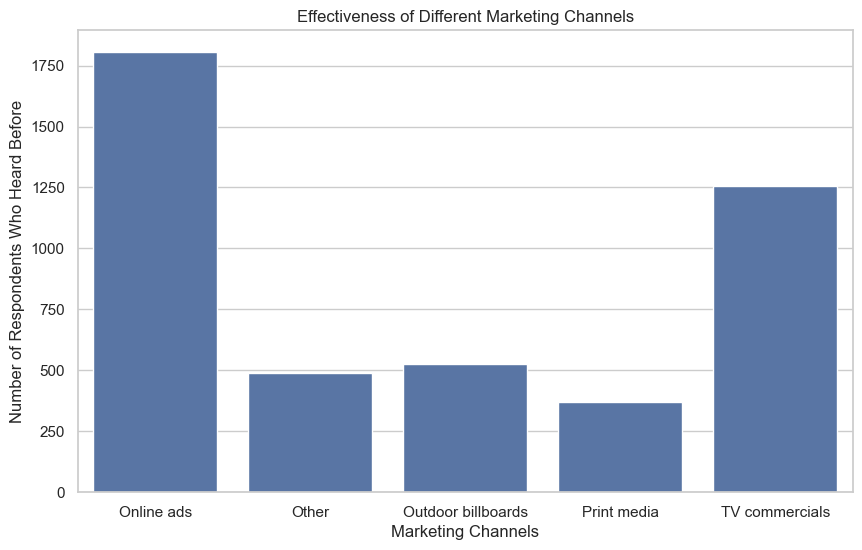

In [97]:
# Plotting the effectiveness of different marketing strategies
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_channels', y='Count', data=effectiveness_df)
plt.title('Effectiveness of Different Marketing Channels')
plt.xlabel('Marketing Channels')
plt.ylabel('Number of Respondents Who Heard Before')
plt.show()


From the chart, it's clear that:

'Online ads' are the most effective marketing channel, reaching the highest number of respondents who had heard about the product before. This suggests that digital marketing strategies, especially online advertising, are the most effective in reaching potential customers.

'TV commercials' are the next most effective marketing channel, reaching a significant number of respondents. This indicates that traditional media continues to play an important role in marketing and should not be overlooked.

'Outdoor billboards', 'Other' methods, and 'Print media' reach fewer respondents, but these channels still represent a considerable portion of the market.

This analysis suggests that a multi-channel marketing strategy, focusing heavily on online ads and TV commercials, could be the most effective way to reach the most customers. Additionally, it might be beneficial to further investigate the 'Other' methods to uncover any additional effective marketing channels.

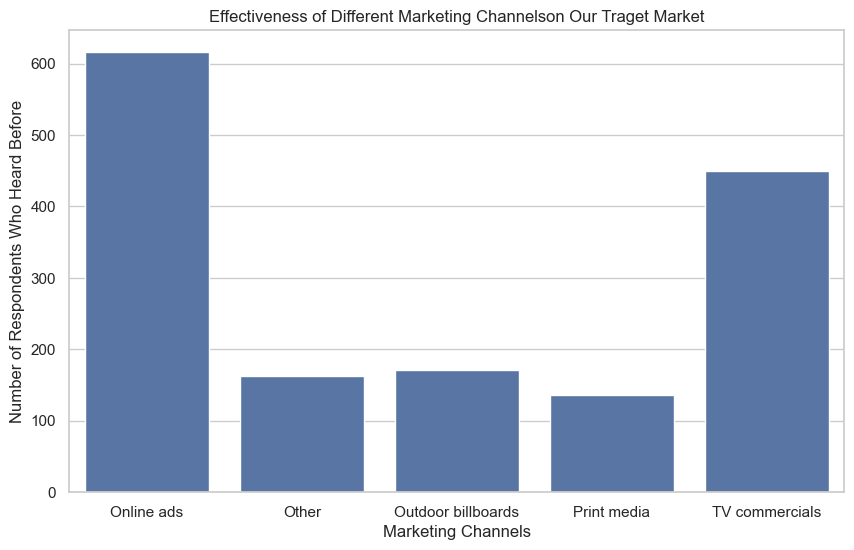

In [98]:
# Grouping and filtering the data to count the number of respondents who have heard before
effectiveness_df_tm = tm_df[tm_df['Heard_before'] == 'Yes'].groupby('Marketing_channels').size().reset_index(name='Count')

effectiveness_df_tm.sort_values(by='Count', ascending=False)


# Plotting the effectiveness of different marketing strategies
plt.figure(figsize=(10, 6))
sns.barplot(x='Marketing_channels', y='Count', data=effectiveness_df_tm)
plt.title('Effectiveness of Different Marketing Channelson Our Traget Market')
plt.xlabel('Marketing Channels')
plt.ylabel('Number of Respondents Who Heard Before')
plt.show()



## Brand Penetration

### What do people think about our brand?

In [99]:
# Extracting the overall brand perception data
brand_perception = data['Brand_perception'].value_counts()

brand_perception


Brand_perception
Neutral     5974
Positive    2257
Negative    1769
Name: count, dtype: int64

We analyzed the 'Brand_perception' column from the survey data, which provides information about how the respondents perceive our brand. The responses are categorized into 'Positive', 'Neutral', and 'Negative'.

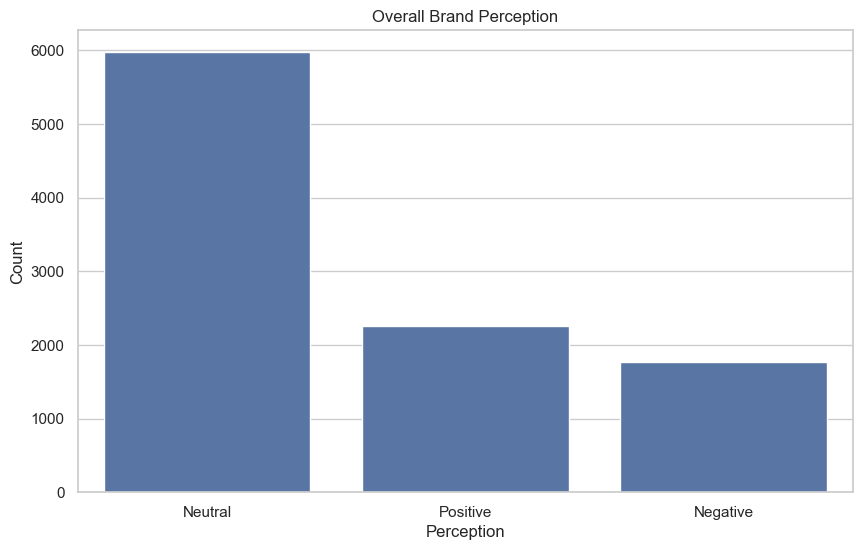

In [100]:
# Plotting the overall brand perception
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_perception.index, y=brand_perception.values)
plt.title('Overall Brand Perception')
plt.xlabel('Perception')
plt.ylabel('Count')
plt.show()


The majority of respondents have a 'Neutral' perception of our brand. This could mean that many respondents do not have a strong opinion about the brand or are unaware of it. There's a significant opportunity here to shift this neutral perception to a positive one through effective marketing and product quality improvements.

A considerable number of respondents have a 'Positive' perception of the brand, which is a good sign. However, this group is less than half of those with a neutral perception, indicating room for improvement.

A smaller, yet significant, number of respondents have a 'Negative' perception of our brand. It's crucial to understand the reasons behind this negative perception and address them to improve overall brand perception.

Overall, these insights suggest that while the brand is perceived positively by some respondents, there is a significant opportunity to enhance brand perception, particularly among those with a neutral or negative view of the brand. This could involve improving product quality, addressing any issues causing negative perceptions, and implementing marketing strategies that effectively communicate the brand's value proposition.

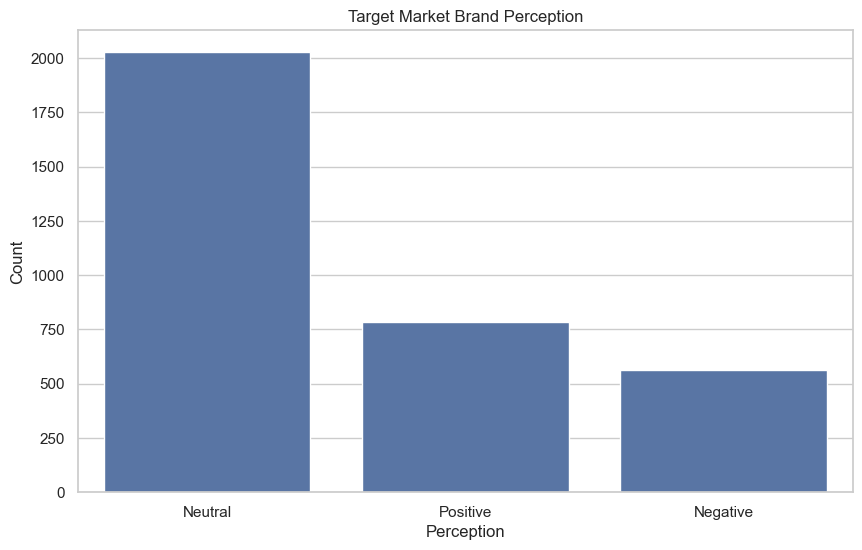

In [101]:
# Extracting the overall brand perception data
brand_perception_tm = tm_df['Brand_perception'].value_counts()

brand_perception_tm

# Plotting the overall brand perception
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_perception_tm.index, y=brand_perception_tm.values)
plt.title('Target Market Brand Perception')
plt.xlabel('Perception')
plt.ylabel('Count')
plt.show()

### Which cities do we need to focus more on?

In [102]:
# Extracting the city-wise distribution of respondents
city_focus = data[data['Heard_before'] == 'No']['City'].value_counts()

city_focus

City
Bangalore    1670
Hyderabad    1105
Mumbai        611
Chennai       565
Pune          529
Kolkata       356
Ahmedabad     249
Jaipur        216
Delhi         162
Lucknow        90
Name: count, dtype: int64

We analyzed the 'City' column from the survey data, which indicates the cities where the respondents are located. The count of respondents in each city gives us an idea of the brand's current market penetration in different cities.

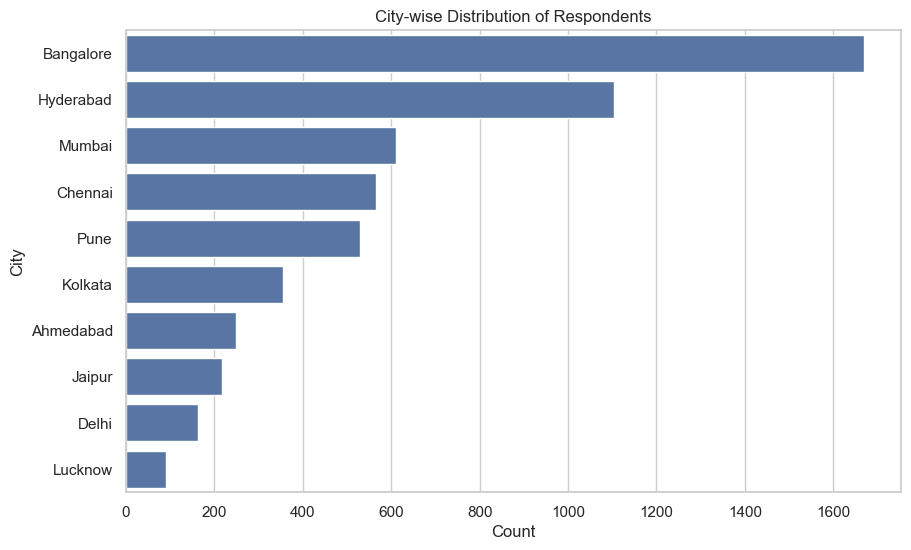

In [103]:
# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=city_focus.index, x=city_focus.values, orient='h')
plt.title('City-wise Distribution of Respondents')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


From the chart, we can see that:

The brand has the highest penetration in Bangalore, Hyderabad, and Mumbai, as these cities have the highest number of respondents.

The brand's presence is comparatively lower in cities like Lucknow, Jaipur, and Delhi.

This suggests that there could be a significant opportunity to increase market share in cities where the brand currently has lower penetration. Focusing marketing efforts and improving product availability in these cities could potentially lead to increased brand awareness and market share. It may also be beneficial to conduct further research to understand the specific factors affecting the brand's performance in these cities.

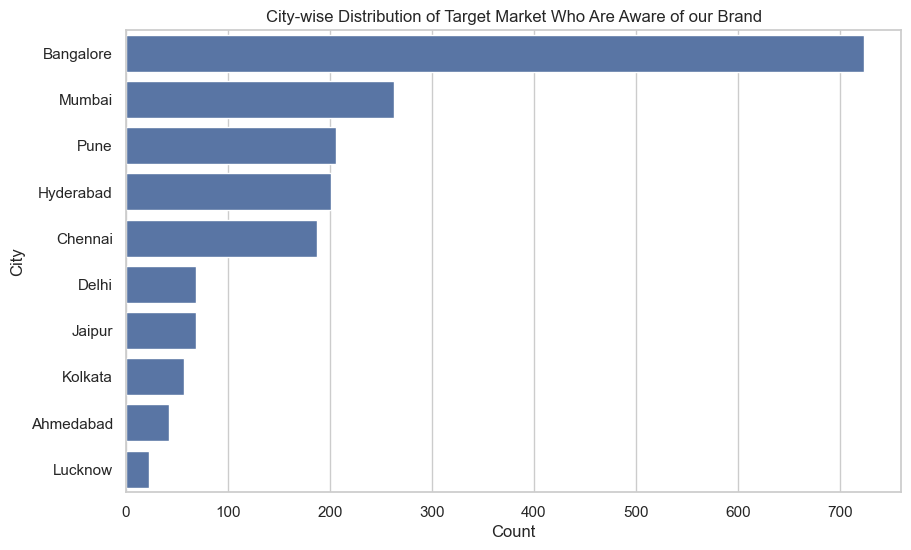

In [104]:
# Extracting the city-wise distribution of respondents
dw_city_focus_tm = tm_df[tm_df['Heard_before'] == 'No']['City'].value_counts()

dw_city_focus_tm

# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=dw_city_focus_tm.index, x=dw_city_focus_tm.values, orient='h')
plt.title('City-wise Distribution of Target Market Who Are Aware of our Brand')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


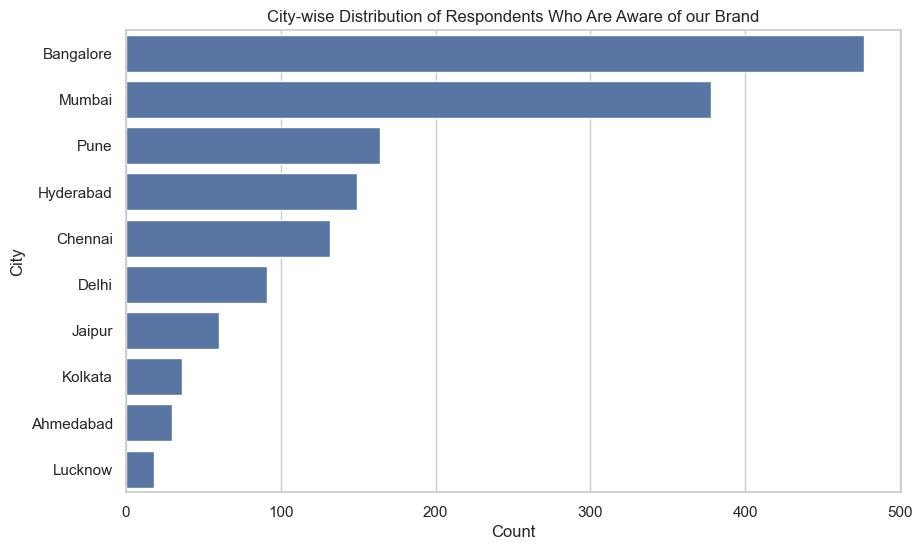

In [105]:
# Extracting the city-wise distribution of respondents
city_focus_tm = tm_df[tm_df['Heard_before'] == 'Yes']['City'].value_counts()

city_focus_tm

# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=city_focus_tm.index, x=city_focus_tm.values, orient='h')
plt.title('City-wise Distribution of Respondents Who Are Aware of our Brand')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()


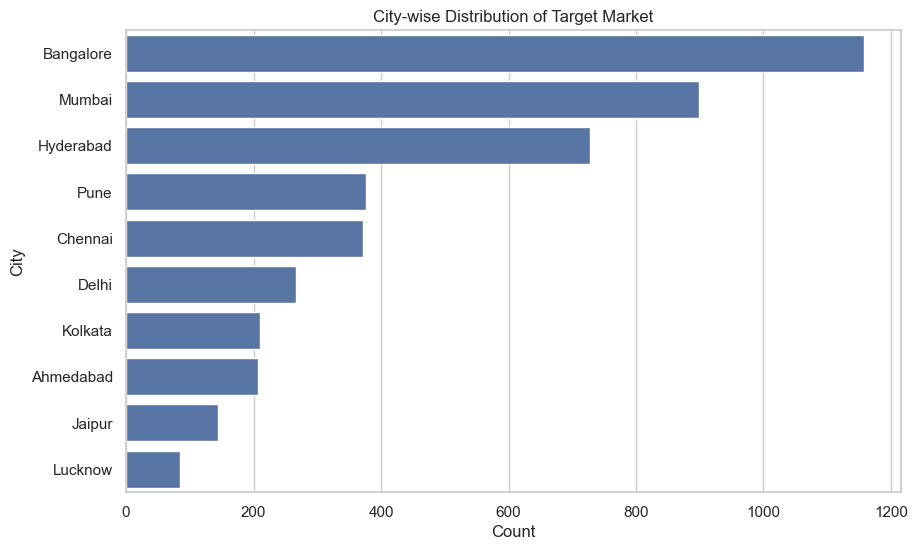

In [106]:
# Extracting the city-wise distribution of respondents
city_focus_tm = data[data['Heard_before'] == 'Yes']['City'].value_counts()

city_focus_tm

# Plotting the city-wise distribution of respondents
plt.figure(figsize=(10, 6))
sns.barplot(y=city_focus_tm.index, x=city_focus_tm.values, orient='h')
plt.title('City-wise Distribution of Target Market')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

## Purchase Behavior

### Where do respondents prefer to purchase energy drinks?

In [107]:
# Extracting the preferred purchase locations data
purchase_location = data['Purchase_location'].value_counts()

purchase_location


Purchase_location
Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: count, dtype: int64

We analyzed the 'Purchase_location' column from the survey data, which provides information about where the respondents prefer to purchase energy drinks. The responses are categorized into 'Supermarkets', 'Online retailers', 'Gyms and fitness centers', 'Local stores', and 'Other'.

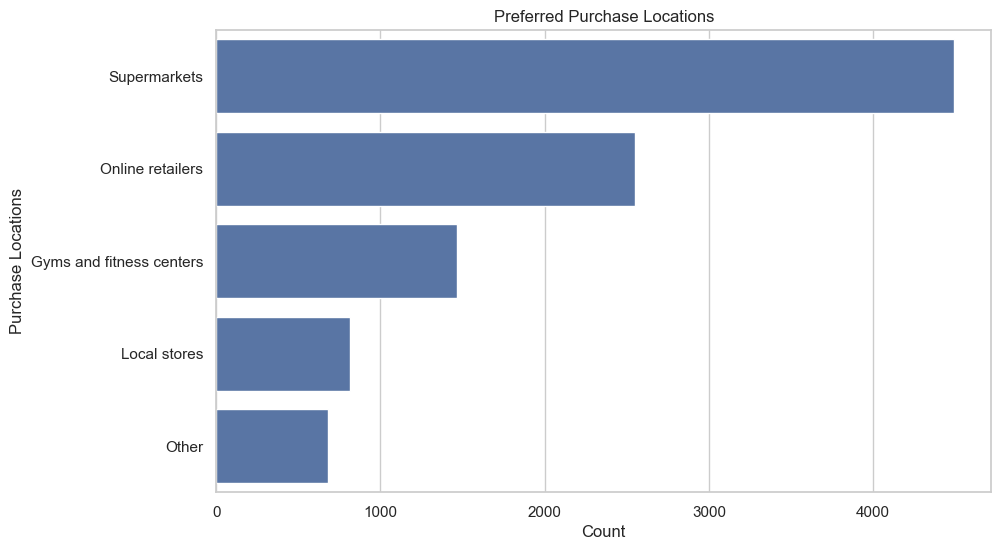

In [108]:
# Plotting the preferred purchase locations
plt.figure(figsize=(10, 6))
sns.barplot(y=purchase_location.index, x=purchase_location.values, orient='h')
plt.title('Preferred Purchase Locations')
plt.xlabel('Count')
plt.ylabel('Purchase Locations')
plt.show()


From the chart, we can see that:

'Supermarkets' are the most preferred location for purchasing energy drinks. This could be due to the convenience, variety of options, and competitive pricing usually offered by supermarkets.

'Online retailers' and 'Gyms and fitness centers' are the next most preferred locations. The popularity of online retailers could be attributed to the convenience and potential for home delivery, while gyms and fitness centers could be popular due to the association between energy drinks and exercise.

'Local stores' and 'Other' locations are less popular but still represent a significant portion of purchase locations.

These insights suggest that ensuring product availability in supermarkets, online retail platforms, and gyms and fitness centers could be key to reaching potential customers. Additionally, it could be beneficial to investigate the 'Other' locations to uncover any additional effective points of sale.

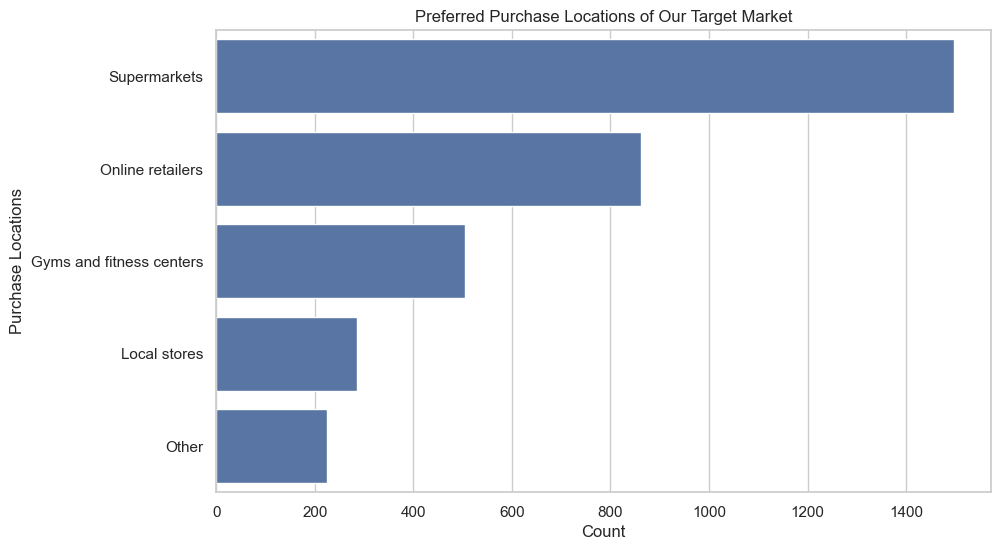

In [109]:
# Extracting the preferred purchase locations data
purchase_location_tm = tm_df['Purchase_location'].value_counts()

purchase_location_tm

# Plotting the preferred purchase locations
plt.figure(figsize=(10, 6))
sns.barplot(y=purchase_location_tm.index, x=purchase_location_tm.values, orient='h')
plt.title('Preferred Purchase Locations of Our Target Market')
plt.xlabel('Count')
plt.ylabel('Purchase Locations')
plt.show()


### What are the typical consumption situations for energy drinks among respondents?

In [110]:
# Extracting the typical consumption situations data
consumption_situation = data['Typical_consumption_situations'].value_counts()

consumption_situation


Typical_consumption_situations
Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: count, dtype: int64

We analyzed the 'Typical_consumption_situations' column from the survey data, which provides information about the typical situations in which respondents consume energy drinks. The responses include 'Sports/exercise', 'Studying/working late', 'Social outings/parties', 'Driving/commuting', and 'Other'.

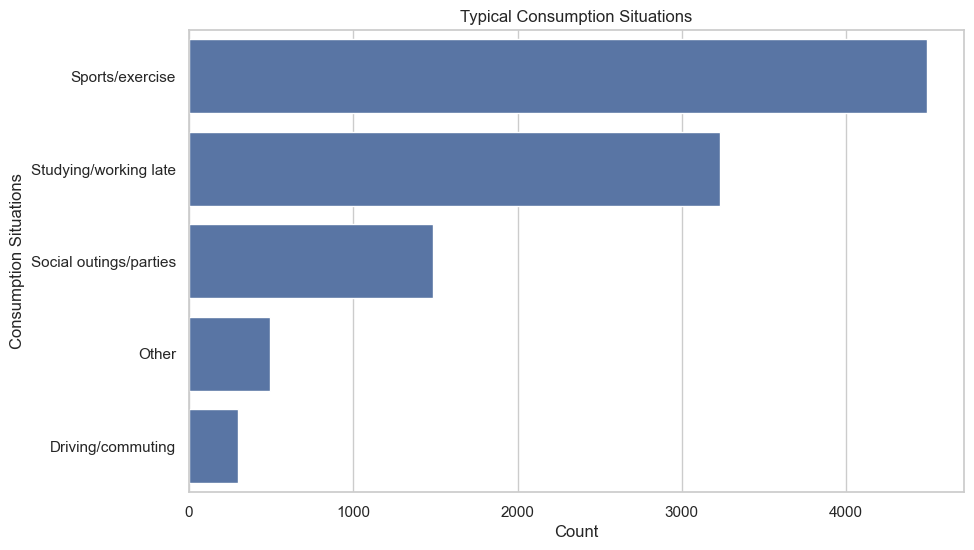

In [111]:
# Plotting the typical consumption situations
plt.figure(figsize=(10, 6))
sns.barplot(y=consumption_situation.index, x=consumption_situation.values, orient='h')
plt.title('Typical Consumption Situations')
plt.xlabel('Count')
plt.ylabel('Consumption Situations')
plt.show()


From the chart, we can see that:

'Sports/exercise' is the most common situation in which respondents consume energy drinks. This suggests that many respondents associate energy drinks with physical activity and performance enhancement.

'Studying/working late' is the next most common consumption situation. This indicates that many respondents consume energy drinks for a boost of energy and focus during late-night study or work sessions.

'Social outings/parties', 'Driving/commuting', and 'Other' situations are less common but still represent a significant portion of consumption situations.

These insights suggest that marketing efforts could benefit from focusing on the benefits of the product in the most common consumption situations, such as during sports/exercise and when studying/working late. Further investigation into the 'Other' situations could also provide additional insights into how and when respondents typically consume energy drinks.

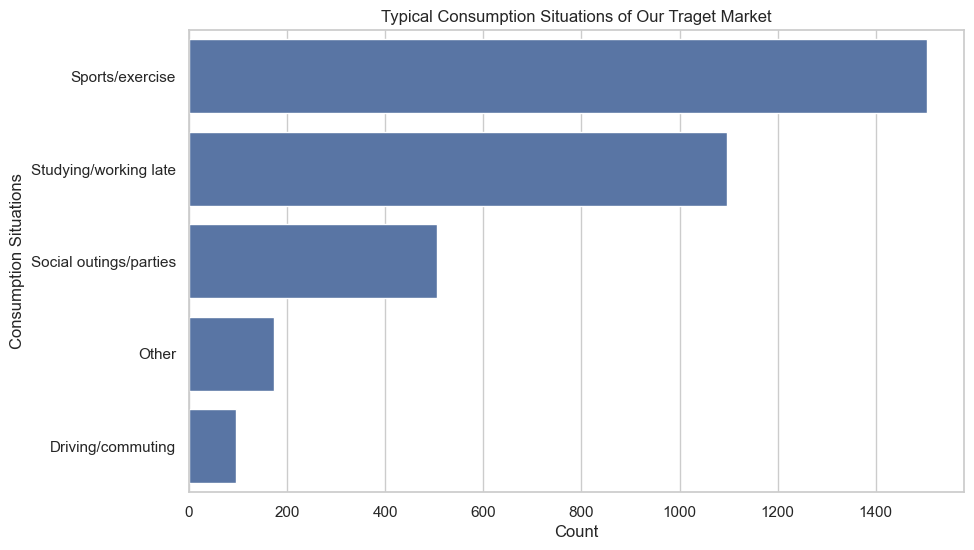

In [112]:
# Extracting the typical consumption situations data
consumption_situation_tm = tm_df['Typical_consumption_situations'].value_counts()

consumption_situation_tm

# Plotting the typical consumption situations
plt.figure(figsize=(10, 6))
sns.barplot(y=consumption_situation_tm.index, x=consumption_situation_tm.values, orient='h')
plt.title('Typical Consumption Situations of Our Traget Market')
plt.xlabel('Count')
plt.ylabel('Consumption Situations')
plt.show()

### What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

In [113]:
# Extracting the factors that influence purchase decisions
# 6.c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?
price_range = data['Price_range'].value_counts()
limited_edition_packaging = data['Limited_edition_packaging'].value_counts()

price_range, limited_edition_packaging


(Price_range
 50-99        4288
 100-150      3142
 Above 150    1561
 Below 50     1009
 Name: count, dtype: int64,
 Limited_edition_packaging
 No          4023
 Yes         3946
 Not Sure    2031
 Name: count, dtype: int64)

We analyzed the 'Price_range' and 'Limited_edition_packaging' columns from the survey data. The 'Price_range' column indicates the price range that respondents prefer for energy drinks, and the 'Limited_edition_packaging' column indicates whether respondents are interested in limited edition packaging.

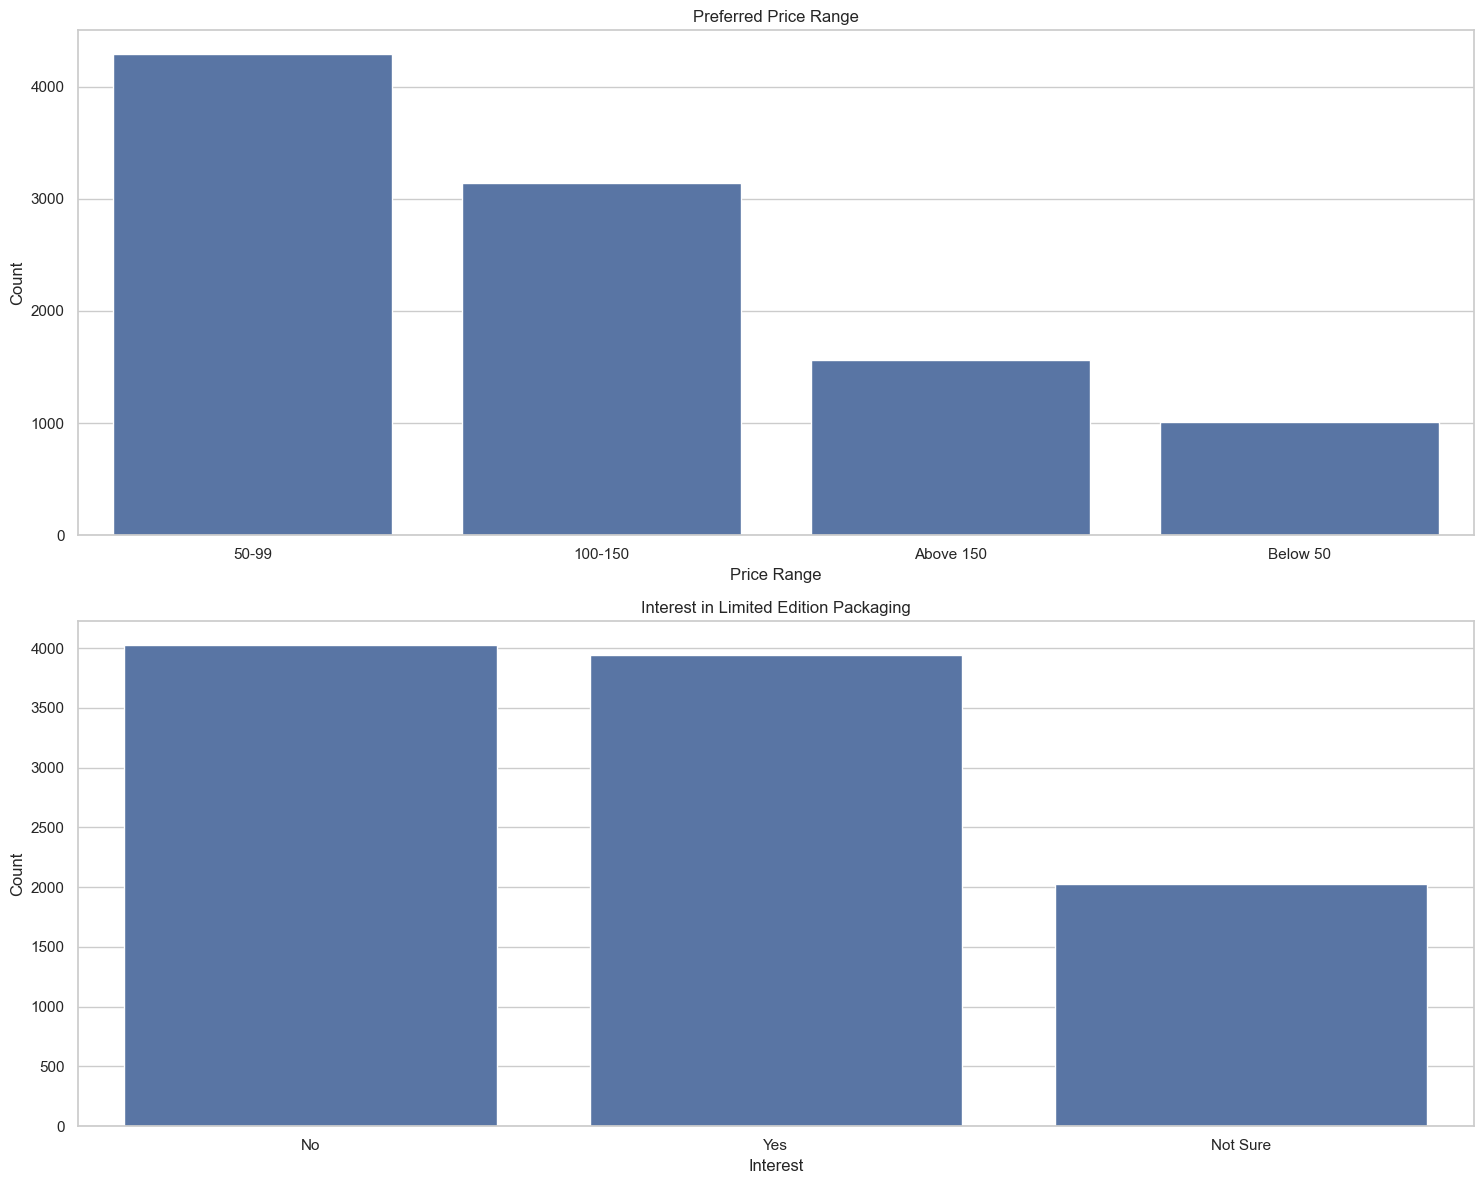

In [114]:
# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

# Plot for price range
sns.barplot(x=price_range.index, y=price_range.values, ax=ax[0])
ax[0].set_title('Preferred Price Range')
ax[0].set_xlabel('Price Range')
ax[0].set_ylabel('Count')

# Plot for limited edition packaging
sns.barplot(x=limited_edition_packaging.index, y=limited_edition_packaging.values, ax=ax[1])
ax[1].set_title('Interest in Limited Edition Packaging')
ax[1].set_xlabel('Interest')
ax[1].set_ylabel('Count')

# Adjust the subplots for better layout
plt.tight_layout()

# Show the plots
plt.show()


From the charts, we can see that:

The most preferred price range among respondents is 50-99, followed by 100-150. This suggests that pricing the product within these ranges could appeal to a majority of potential customers.

Respondents are almost evenly split between being interested and not interested in limited edition packaging, with a significant portion being unsure. This indicates that while there might be a market for limited edition packaging, further research might be needed to determine its potential success.

These insights suggest that pricing and packaging could significantly influence the purchase decisions of potential customers. Therefore, it could be beneficial to consider these factors when developing pricing and packaging strategies.

In [115]:
data.groupby(['Limited_edition_packaging','Price_range']).count()

Response_ID  Respondent_ID  \
Limited_edition_packaging Price_range                               
No                        100-150             1244           1244   
                          50-99               1741           1741   
                          Above 150            639            639   
                          Below 50             399            399   
Not Sure                  100-150              635            635   
                          50-99                868            868   
                          Above 150            322            322   
                          Below 50             206            206   
Yes                       100-150             1263           1263   
                          50-99               1679           1679   
                          Above 150            600            600   
                          Below 50             404            404   

                                       Consume_frequency  Consume_time  \
Limited_edition_packaging Price_range                                    
No                        100-150                   1244          1244   
                          50-99                     1741          1741   
                          Above 150                  639           639   
                          Below 50                   399           399   
Not Sure                  100-150                    635           635   
                          50-99                      868           868   
                          Above 150                  322           322   
                          Below 50                   206           206   
Yes                       100-150                   1263          1263   
                          50-99                     1679          1679   
                          Above 150                  600           600   
                          Below 50                   404           404   

                                       Consume_reason  Heard_before  \
Limited_edition_packaging Price_range                                 
No                        100-150                1244          1244   
                          50-99                  1741          1741   
                          Above 150               639           639   
                          Below 50                399           399   
Not Sure                  100-150                 635           635   
                          50-99                   868           868   
                          Above 150               322           322   
                          Below 50                206           206   
Yes                       100-150                1263          1263   
                          50-99                  1679          1679   
                          Above 150               600           600   
                          Below 50                404           404   

                                       Brand_perception  General_perception  \
Limited_edition_packaging Price_range                                         
No                        100-150                  1244                1244   
                          50-99                    1741                1741   
                          Above 150                 639                 639   
                          Below 50                  399                 399   
Not Sure                  100-150                   635                 635   
                          50-99                     868                 868   
                          Above 150                 322                 322   
                          Below 50                  206                 206   
Yes                       100-150                  1263                1263   
                          50-99                    1679                1679   
                          Above 150                 600                 600   
             

## Product Development

### Which area of business should we focus more on our product development? (Branding/taste/availability)

In [116]:
# Creating a new DataFrame 'ProductDev' and dropping inconsistent responses
ProductDev = data[~((data['Heard_before'] == 'No') & (data['Taste_experience'] != 0))]

# Checking for taste more than 1 standard deviation less than the mean
taste = ProductDev[ProductDev['Taste_experience'] < ProductDev['Taste_experience'].mean() - ProductDev['Taste_experience'].std()]

# Checking for 'Not available locally'
availability = ProductDev[ProductDev['Reasons_preventing_trying'] == 'Not available locally']

# Checking for negative branding
branding = ProductDev[(ProductDev['Brand_perception'] == 'Negative') | (ProductDev['Brand_perception'] == 'Neutral')]

# Counting the number of respondents for each focus area
focus_areas_counts = {
    'Taste': len(taste),
    'Availability': len(availability),
    'Branding': len(branding)
}

focus_areas_counts


{'Taste': 1135, 'Availability': 1057, 'Branding': 3368}

The bar chart represents the three focus areas for product development: taste, availability, and branding. This time, we considered the following conditions:

Taste scores that are more than one standard deviation below the mean.
Product availability issues where it is not available locally.
Negative brand perceptions among respondents.

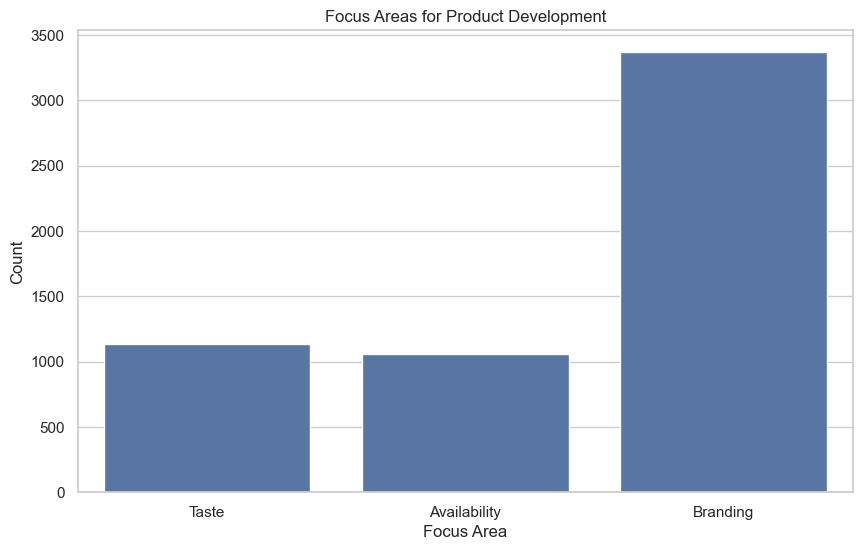

In [117]:
# Create a DataFrame for visualization
focus_areas_df = pd.DataFrame({
    'Focus Area': list(focus_areas_counts.keys()),
    'Count': list(focus_areas_counts.values())
})

# Plotting the focus areas
plt.figure(figsize=(10, 6))
sns.barplot(x='Focus Area', y='Count', data=focus_areas_df)
plt.title('Focus Areas for Product Development')
plt.ylabel('Count')
plt.show()


From the chart, we can see that:

Taste: There is a significant number of respondents (around 1135) whose taste experience scores are more than one standard deviation below the mean. This suggests that taste is a crucial area where the product could potentially be improved.

Availability: There are over 1000 respondents who haven't tried the product because it's not available locally. This suggests that improving the product's availability could be beneficial.

Branding: There are over 800 respondents who have a negative perception of the brand. This indicates that enhancing the brand's reputation and perception could be a

# Secondary Insights

## Which Categories are Associated with a positive brand perception?

In [118]:
from scipy.stats import chi2_contingency

# Select the categorical columns to analyze
categorical_columns = ['Consume_frequency', 'Consume_time', 'Consume_reason', 'Heard_before',
                       'General_perception', 'Tried_before', 'Health_concerns',
                       'Interest_in_natural_or_organic', 'Marketing_channels',
                       'Packaging_preference', 'Limited_edition_packaging',
                       'Price_range', 'Purchase_location', 'Typical_consumption_situations']

# Perform chi-square test for each categorical column
association_results = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(data[column], data['Brand_perception'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    association_results[column] = {'chi2': chi2, 'p-value': p}

# Sort the results by p-value in ascending order
sorted_results = sorted(association_results.items(), key=lambda x: x[1]['p-value'])

sorted_results


[('Tried_before',
  {'chi2': 63.025909001877565, 'p-value': 2.0610937757156496e-14}),
 ('Heard_before',
  {'chi2': 17.32244944313701, 'p-value': 0.00017317208938341387}),
 ('Consume_time',
  {'chi2': 25.904571671951512, 'p-value': 0.0002319421754119655}),
 ('Consume_reason',
  {'chi2': 14.995757629325482, 'p-value': 0.05922800257998424}),
 ('Marketing_channels',
  {'chi2': 14.169903408609523, 'p-value': 0.077443029014158}),
 ('Packaging_preference',
  {'chi2': 11.742337904703177, 'p-value': 0.16307566863037326}),
 ('Purchase_location',
  {'chi2': 11.003090860500006, 'p-value': 0.2015241277764022}),
 ('Consume_frequency',
  {'chi2': 10.325989149131875, 'p-value': 0.2428870403428994}),
 ('Price_range', {'chi2': 6.378055805241419, 'p-value': 0.3821983534577697}),
 ('Typical_consumption_situations',
  {'chi2': 8.46311796542934, 'p-value': 0.3895861683065296}),
 ('Interest_in_natural_or_organic',
  {'chi2': 3.231907033202179, 'p-value': 0.5197928812460315}),
 ('Health_concerns',
  {'chi2': 

In [119]:
alpha = 0.10

for column, result in sorted_results:
    p_value = result['p-value']
    if p_value <= alpha:
        print(f"Reject null hypothesis for {column} (p-value: {p_value})")
    else:
        print(f"Fail to reject null hypothesis for {column} (p-value: {p_value})")


Reject null hypothesis for Tried_before (p-value: 2.0610937757156496e-14)
Reject null hypothesis for Heard_before (p-value: 0.00017317208938341387)
Reject null hypothesis for Consume_time (p-value: 0.0002319421754119655)
Reject null hypothesis for Consume_reason (p-value: 0.05922800257998424)
Reject null hypothesis for Marketing_channels (p-value: 0.077443029014158)
Fail to reject null hypothesis for Packaging_preference (p-value: 0.16307566863037326)
Fail to reject null hypothesis for Purchase_location (p-value: 0.2015241277764022)
Fail to reject null hypothesis for Consume_frequency (p-value: 0.2428870403428994)
Fail to reject null hypothesis for Price_range (p-value: 0.3821983534577697)
Fail to reject null hypothesis for Typical_consumption_situations (p-value: 0.3895861683065296)
Fail to reject null hypothesis for Interest_in_natural_or_organic (p-value: 0.5197928812460315)
Fail to reject null hypothesis for Health_concerns (p-value: 0.5595966928028124)
Fail to reject null hypothes

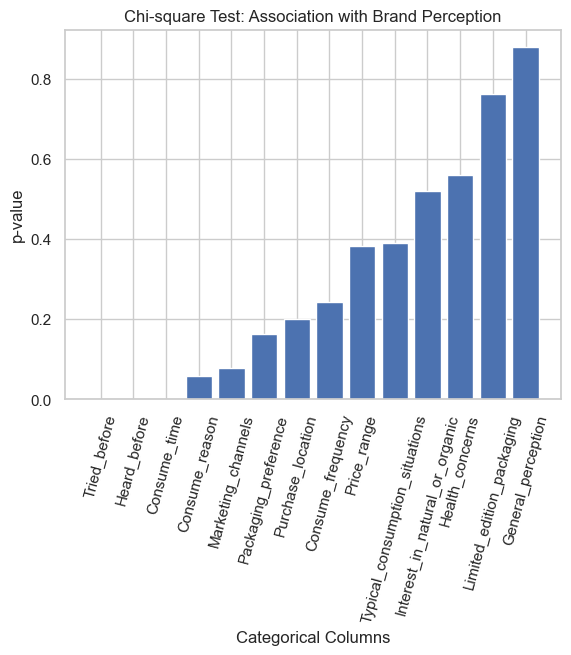

In [120]:
import matplotlib.pyplot as plt

# Extract the column names and p-values from the sorted results
columns = [item[0] for item in sorted_results]
p_values = [item[1]['p-value'] for item in sorted_results]

# Plot the p-values
plt.bar(columns, p_values)
plt.title('Chi-square Test: Association with Brand Perception')
plt.xlabel('Categorical Columns')
plt.ylabel('p-value')
plt.xticks(rotation=75)
plt.show()


###

In [121]:
# Calculate the proportion of positive brand perceptions for each value of 'Consume_time'
consume_time_proportions = data[data['Brand_perception'] == 'Positive']['Consume_time'].value_counts(normalize=True)

consume_time_proportions


Consume_time
To stay awake during work/study    0.339389
Before exercise                    0.313691
For mental alertness               0.194506
Throughout the day                 0.152415
Name: proportion, dtype: float64

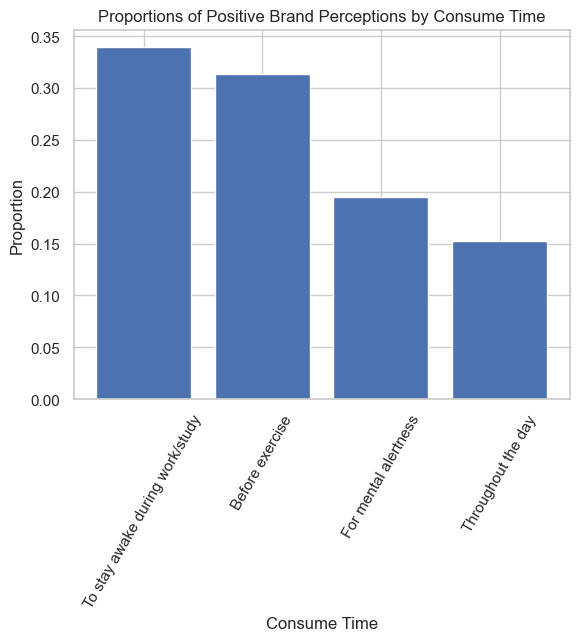

In [122]:
# Plot the proportions
plt.bar(consume_time_proportions.index, consume_time_proportions.values)
plt.title('Proportions of Positive Brand Perceptions by Consume Time')
plt.xlabel('Consume Time')
plt.ylabel('Proportion')
plt.xticks(rotation=60)
plt.show()


In [123]:
# Calculate the proportion of positive brand perceptions for each value of 'Consume_time'
Consume_reason_proportions = data[data['Brand_perception'] == 'Positive']['Consume_reason'].value_counts(normalize=True)

Consume_reason_proportions

Consume_reason
Increased energy and focus       0.366859
To combat fatigue                0.236597
To boost performance             0.162162
To enhance sports performance    0.152858
Other                            0.081524
Name: proportion, dtype: float64

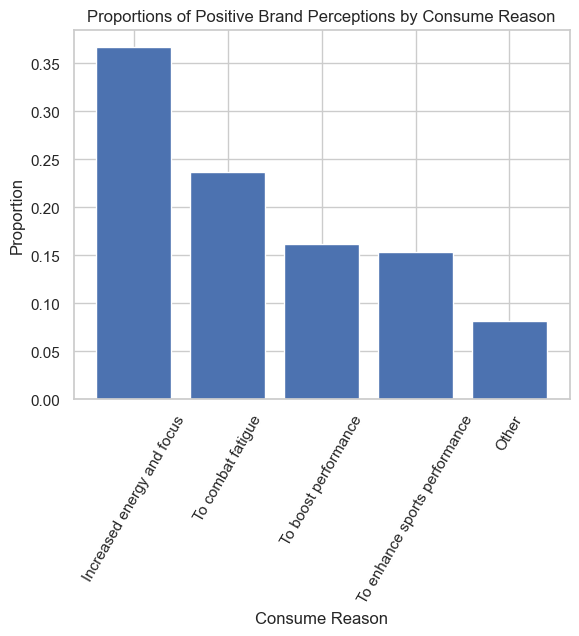

In [124]:
# Plot the proportions
plt.bar(Consume_reason_proportions.index, Consume_reason_proportions.values)
plt.title('Proportions of Positive Brand Perceptions by Consume Reason')
plt.xlabel('Consume Reason')
plt.ylabel('Proportion')
plt.xticks(rotation=60)
plt.show()

In [125]:
# Calculate the proportion of positive brand perceptions for each value of 'Marketing_channels'
marketing_channels_proportions = data[data['Brand_perception'] == 'Positive']['Marketing_channels'].value_counts(normalize=True)

marketing_channels_proportions


Marketing_channels
Online ads            0.393000
TV commercials        0.288436
Outdoor billboards    0.124502
Other                 0.108551
Print media           0.085512
Name: proportion, dtype: float64

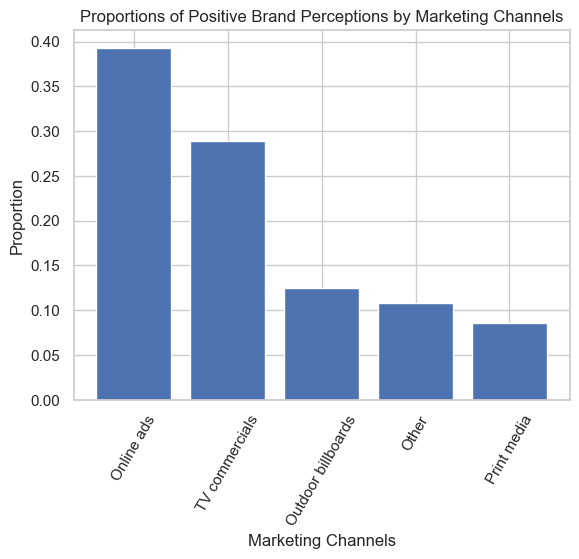

In [126]:
plt.bar(marketing_channels_proportions.index, marketing_channels_proportions.values)
plt.title('Proportions of Positive Brand Perceptions by Marketing Channels')
plt.xlabel('Marketing Channels')
plt.ylabel('Proportion')
plt.xticks(rotation=60)
plt.show()

In [127]:
import statsmodels.stats.proportion as smp

# Calculate the proportions
tm_df_count = len(tm_df)
data_count = len(data)

# Calculate the confidence interval
lower, upper = smp.proportion_confint(tm_df_count, data_count, alpha=0.05)

lower, upper


(0.32823217294513124, 0.3467678270548688)